# Belief in Supernatural Evil and Guns - Assignment 2 Practical Data Science

---

> Nikos Tsoukalelis, Data Science Part Time student <br />
> Athens University of Economics and Business <br />
> ntsoukalelis@aueb.gr

## Q1:

###  Belief in Supernatural Evil Metric

>Firstly we start by reading and understaning the paper that is given to us. It contains a very interesting analysis about the role of the belief in supernatural evil plays in gun pocession regilations.
> <br> To collect and work with the data of the paper we downloaded the data from the site https://www.thearda.com/Archive/Files/Codebooks/BRS2014ED_CB.asp in whcih there is available the documentation 
> <br> for the dataset. We read the file after we download it to examine the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats.stats as stats
%matplotlib inline
from sklearn import *
from sklearn.metrics import mean_squared_error

religion_survey = pd.read_excel('Baylor Religion Survey, Wave IV (2014) - Instructional Dataset.xlsx', index_col=0) 

> Then we select only the 3 questions that we want to find the metric for.
> - Whether the respondent believes in the devil.
> - Whether the respondent believes in hell.
> - Whether the respondent believes in demons.
>
> <br> To do that we add a column that is dependent on these 3 columns(Q23A, Q23C and Q23G that correspond to the above questions). Similarly to the paper's method we calculate the sum for each interviewee and devide with the number of items to find the mean-answer for these three questions 

In [2]:
religion_survey['belief_in_evil'] = (religion_survey['Q23A'] + religion_survey['Q23C'] + religion_survey['Q23G'])/3
religion_survey['belief_in_evil'] = religion_survey.belief_in_evil.round(2)
religion_survey

,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,TEMPLATE_NUMBER_162048140,...,PARTYIDR,CHILDSR,HRSWORKD,EDUCR,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND,belief_in_evil
MOTHERLODE_ID,,,,,,,,,,,,,,,,,,,,,
128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,162048140,...,2.0,2.0,NaN,4.0,2.0,5.0,3.0,1.0,6.0,4.00
128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,162048140,...,3.0,2.0,5.0,3.0,2.0,3.0,3.0,3.0,2.0,4.00
128170894,33370,01_000003_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,162048140,...,3.0,NaN,NaN,3.0,2.0,3.0,1.0,2.0,6.0,2.33
128170895,33370,01_000004_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,162048140,...,1.0,NaN,0.0,3.0,2.0,4.0,3.0,2.0,5.0,4.00
128170896,33370,01_000005_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,162048140,...,NaN,3.0,4.0,2.0,1.0,2.0,2.0,1.0,6.0,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128172920,33371,02_000301_00000013,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/10/2014,es-AR,162048140,...,3.0,2.0,1.0,4.0,2.0,5.0,2.0,4.0,2.0,3.33
128172921,33371,02_000326_00000014,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/12/2014,es-AR,162048140,...,3.0,1.0,3.0,2.0,2.0,2.0,2.0,4.0,1.0,3.00
128172922,33371,02_000351_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,162048140,...,3.0,NaN,4.0,3.0,2.0,3.0,1.0,5.0,6.0,3.67


> Checking the metric we have created with some decriptive statistics

In [3]:
religion_survey['belief_in_evil'].describe()

count    1474.000000
mean        3.080387
std         1.056468
min         1.000000
25%         2.330000
50%         3.670000
75%         4.000000
max         4.000000
Name: belief_in_evil, dtype: float64

> Then we need to fill the N/A values we have on these 3 questions/columns. 
> <br> To do that as we have categorical variables we choose to fill the gaps with the most common values for each column (i.e. the mode)

In [4]:
religion_survey['Q23G'].mode()

0    4.0
dtype: float64

In [5]:
religion_survey['Q23A'].mode()

0    4.0
dtype: float64

In [6]:
religion_survey['Q23A'].mode()

0    4.0
dtype: float64

In [7]:
religion_survey['Q23A']=religion_survey['Q23A'].fillna(4)

religion_survey['Q23C']=religion_survey['Q23C'].fillna(4)

religion_survey['Q23G']=religion_survey['Q23G'].fillna(4)

> We re-calculate the metric "belief_in_evil"

In [8]:
religion_survey['belief_in_evil'] = (religion_survey['Q23A'] + religion_survey['Q23C'] + religion_survey['Q23G'])/3
religion_survey['belief_in_evil'] = religion_survey.belief_in_evil.round(2)

> We then check again the decriptive statistics and we see that mean and std are really close to the ones we have in the paper:
> <br> 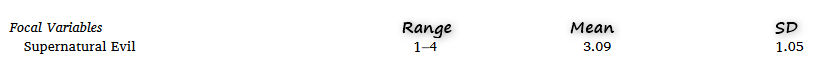

In [9]:
religion_survey['belief_in_evil'].describe()

count    1572.000000
mean        3.127958
std         1.044540
min         1.000000
25%         2.330000
50%         3.670000
75%         4.000000
max         4.000000
Name: belief_in_evil, dtype: float64

### Conclusions - Q1

 So we created the metric requested, by the name 'belief_in_evil', with the method followed in the paper we had as a reference. As stated above the method of the filling for the N/A that was followed was based on the most common value i.e the mode of a specific column as we have categorical variables and mean would not have an practical meaning (as we describe answers)

## Q2:

###  Variables Selection

> For this question we need to examine and analyze the variables given.
> <br> First thing to do is to create dummy variables. Though, to do that we need to examine and process our data first.
> <br> We select the variables we need only.
> <br> Then we try to fill the null values with the "mode" for each variable
> 
><br> I chose to fill the NaNs. Another technique would be probably to remove them from the dependent variables and predict them from the model. Although deleting the NaNs would delete actuall answers of the ><br>subjects that underwent the survery. With the filling I know I probably made the dataset more "biased", but this effect does not mess the general outcome. 

In [10]:
import random
import numpy as np

religion_survey2 = religion_survey[['Q23A', 'Q23C', 'Q23G', 'belief_in_evil', 'Q73A', 'Q73E' ,'Q73G', 'Q73H' ,'Q73C', 'Q73F' ,'Q73B', 'Q73D' ,'Q4', 'Q17' ,'RELTRAD', 'Q31' ,'AGE', 'AGER' ,'Q77',
                                    'Q88A','Q88B','Q88C','Q88D','Q88E','Q88F','Q89','Q90' ,'Q95', 'Q51A' ,'Q93','Q93_NONE', 'Q80' ,'STATE']]

religion_survey2['Q73A'] = religion_survey2['Q73A'].fillna(religion_survey2['Q73A'].mode()[0])
religion_survey2['Q73E'] = religion_survey2['Q73E'].fillna(religion_survey2['Q73E'].mode()[0])
religion_survey2['Q73G'] = religion_survey2['Q73G'].fillna(religion_survey2['Q73G'].mode()[0])
religion_survey2['Q73H'] = religion_survey2['Q73H'].fillna(religion_survey2['Q73H'].mode()[0])
religion_survey2['Q73C'] = religion_survey2['Q73C'].fillna(religion_survey2['Q73C'].mode()[0])
religion_survey2['Q73F'] = religion_survey2['Q73F'].fillna(religion_survey2['Q73F'].mode()[0])
religion_survey2['Q73B'] = religion_survey2['Q73B'].fillna(religion_survey2['Q73B'].mode()[0])
religion_survey2['Q73D'] = religion_survey2['Q73D'].fillna(religion_survey2['Q73D'].mode()[0])
religion_survey2['Q4'] = religion_survey2['Q4'].fillna(religion_survey2['Q4'].mode()[0])
religion_survey2['Q17'] = religion_survey2['Q17'].fillna(religion_survey2['Q17'].mode()[0])
religion_survey2['RELTRAD'] = religion_survey2['RELTRAD'].fillna(religion_survey2['RELTRAD'].mode()[0])
religion_survey2['AGE'] = religion_survey2['AGE'].fillna(religion_survey2['AGE'].mode()[0])
religion_survey2['Q77'] = religion_survey2['Q77'].fillna(religion_survey2['Q77'].mode()[0])
religion_survey2['Q90'] = religion_survey2['Q90'].fillna(religion_survey2['Q90'].mode()[0])
religion_survey2['Q51A'] = religion_survey2['Q51A'].fillna(religion_survey2['Q51A'].mode()[0])
religion_survey2['Q80'] = religion_survey2['Q80'].fillna(religion_survey2['Q80'].mode()[0])
religion_survey2['Q31'] = religion_survey2['Q31'].fillna(religion_survey2['Q31'].mode()[0])
religion_survey2['Q95'] = religion_survey2['Q95'].fillna(religion_survey2['Q95'].mode()[0])

<ipython-input-10-97109288eafa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  religion_survey2['Q73A'] = religion_survey2['Q73A'].fillna(religion_survey2['Q73A'].mode()[0])
<ipython-input-10-97109288eafa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  religion_survey2['Q73E'] = religion_survey2['Q73E'].fillna(religion_survey2['Q73E'].mode()[0])
<ipython-input-10-97109288eafa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

> We then re-name the columns to be similar with the ones given in the Appendix A.

In [11]:
religion_survey2.columns = ['devil', 'hell', 'demons', 'belief_in_evil', 'Ban_SemiAuto_Guns','Ban_High_Capacity_Ammo_Clips','Ban_Civilian_Handguns','Support_Concealed_Carry_Laws',
                            'MoreSecurity_Schools','Teachers_having_Guns','GunSafety_Programs','Mental_Health_Screening','Attendance','beliefs_about_Bible','Religious_Tradition',
                            'Political_views','AGE','AGER','SEX','Race_White','Race_African_American','Race_Indian_AlaskaNative','Race_Asian','Race_Pacific','Race_other','Race_Latino',
                            'education_level','Household_Income','marital_status','Kids_under_18','Kids_under_18_NONE','Area_Demographics','Region']


> In the next step and after studying the data and the variables I transformed the values (from numbers that correspond to the number of the answer given, to categorical e.g. if the answers for a question
 are 1 and 2, the transformation that took place is 1-> Yes and 2-> No)
><br> For some parameters I needed to make combinations, for example for the education level I put "4" and "5" under the same value "Some college" so I can get the variables requested.

In [12]:
religion_survey2['Ban_SemiAuto_Guns'].replace({1: "favor", 2: "oppose"}, inplace=True)
religion_survey2['Ban_High_Capacity_Ammo_Clips'].replace({1: "favor", 2: "oppose"}, inplace=True)
religion_survey2['Ban_Civilian_Handguns'].replace({1: "favor", 2: "oppose"}, inplace=True)
religion_survey2['Support_Concealed_Carry_Laws'].replace({1: "favor", 2: "oppose"}, inplace=True)
religion_survey2['MoreSecurity_Schools'].replace({1: "favor", 2: "oppose"}, inplace=True)
religion_survey2['Teachers_having_Guns'].replace({1: "favor", 2: "oppose"}, inplace=True)
religion_survey2['GunSafety_Programs'].replace({1: "favor", 2: "oppose"}, inplace=True)
religion_survey2['Mental_Health_Screening'].replace({1: "favor", 2: "oppose"}, inplace=True)
#religion_survey2['Attendance'].replace({0: "Never", 1: "Less than once a year", 2: "Once or twice a year", 3: "Several times a year", 4: "Once a month", 5: "2-3 times a month", 6: "About weekly", 7: "Weekly", 8: "Several times a week"}, inplace=True)
religion_survey2['beliefs_about_Bible'].replace({1: "Literal", 2: "Inerrancy ", 3: "human error and legends", 4: "human error and legends"}, inplace=True)
religion_survey2['Religious_Tradition'].replace({ 1: "Conservative Protestant", 2: "Mainline Protestant", 3: "Black Protestant", 4: "Catholic", 5: "Other", 6: "Other", 7: "No Affiliation"}, inplace=True)
#religion_survey2['Political_views'].replace({1: "Extremely conservative", 2: "Conservative", 3: "Leaning conservative", 4: "Moderate", 5: "Leaning liberal", 6: "Liberal", 7: "Extremely liberal"}, inplace=True)
religion_survey2['SEX'].replace({1: "Male", 2: "Female"}, inplace=True)
religion_survey2['Race_White'].replace({1: "Yes", 2: "No"}, inplace=True)
religion_survey2['Race_African_American'].replace({1: "Yes", 2: "No"}, inplace=True)
religion_survey2['Race_Indian_AlaskaNative'].replace({1: "Yes", 2: "No"}, inplace=True)
religion_survey2['Race_Asian'].replace({1: "Yes", 2: "No"}, inplace=True)
religion_survey2['Race_Pacific'].replace({1: "Yes", 2: "No"}, inplace=True)
religion_survey2['Race_other'].replace({1: "Yes", 2: "No"}, inplace=True)
religion_survey2['Race_Latino'].replace({1: "No", 2: "Yes",3: "Yes",4: "Yes",5: "Yes"}, inplace=True)
religion_survey2['education_level'].replace({1: "Less than High School", 2: "Less than High School",3: "High school graduate",4: "Some college",5: "Some college",6: "College graduate",7: "Postgraduate Degree"}, inplace=True)
religion_survey2['marital_status'].replace({1: "Not Partnered_Single", 2: "Married_Cohabiating",3: "Married_Cohabiating",4: "Not Partnered_Single",5: "Not Partnered_Single",6: "Not Partnered_Single"}, inplace=True)
religion_survey2['Kids_under_18'].replace({0: "None", 1:"Yes",2:"Yes",3:"Yes",4:"Yes",5:"Yes",6:"Yes", np.nan:"None"}, inplace=True)
#religion_survey2['Kids_under_18_NONE'].replace({1: "none", np.nan:"none"}, inplace=True)
religion_survey2['Area_Demographics'].replace({1: "Urban Area", 2: "Urban Area",3: "Small Town/Rural",4: "Small Town/Rural"}, inplace=True)

#for the Region-variable I found the southern States and where these are given as an answer we got the "South" and if any other state we got "Other". I used an excel formula to transform the data to
#the form needed for the replace function: for example " 'FL':, ". With that I avoided to do it manually.
religion_survey2['Region'].replace({"TX": "South","FL": "South","GA": "South","NC": "South","VA": "South","TN": "South","MD": "South","SC": "South","AL": "South","LA": "South","KY": "South","OK": "South",
                                    "AR": "South","MS": "South","WV": "South","DE": "South",'AK': 'Other','AZ':'Other','CA':'Other','CO':'Other','CT':'Other','DC':'Other','HI':'Other','IA':'Other',
                                    'ID':'Other','IL':'Other','IN':'Other','KS':'Other','MA':'Other','ME':'Other','MI':'Other','MN':'Other','MO':'Other','MT':'Other','ND':'Other','NE':'Other','NH':'Other',
                                    'NJ':'Other','NM':'Other','NV':'Other','NY':'Other','OH':'Other','OR':'Other','PA':'Other','RI':'Other','SD':'Other','UT':'Other','VT':'Other','WA':'Other','WI':'Other',
                                    'WY':'Other'}, inplace=True)

#religion_survey2['Region'].replace(to_replace=['AK','AZ','CA','CO','CT','DC','HI','IA','ID','IL','IN','KS','MA','ME','MI','MN','MO','MT','ND','NE','NH','NJ','NM','NV','NY','OH','OR','PA','RI','SD','UT','VT','WA','WI','WY'
#],value ='Other')

#dropped a column I did not need
religion_survey3=religion_survey2.drop(columns="AGER")
religion_survey3

C:\Users\cob_n\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,devil,hell,demons,belief_in_evil,Ban_SemiAuto_Guns,Ban_High_Capacity_Ammo_Clips,Ban_Civilian_Handguns,Support_Concealed_Carry_Laws,MoreSecurity_Schools,Teachers_having_Guns,...,Race_Pacific,Race_other,Race_Latino,education_level,Household_Income,marital_status,Kids_under_18,Kids_under_18_NONE,Area_Demographics,Region
MOTHERLODE_ID,,,,,,,,,,,,,,,,,,,,,
128170892,4.0,4.0,4.0,4.00,oppose,oppose,oppose,favor,favor,favor,...,NaN,NaN,No,College graduate,2.0,Not Partnered_Single,None,1.0,Small Town/Rural,South
128170893,4.0,4.0,4.0,4.00,favor,favor,oppose,favor,favor,oppose,...,No,NaN,NaN,Some college,1.0,Not Partnered_Single,Yes,NaN,Urban Area,South
128170894,3.0,2.0,2.0,2.33,favor,favor,oppose,oppose,favor,oppose,...,No,No,No,Some college,3.0,Not Partnered_Single,None,NaN,Small Town/Rural,Other
128170895,4.0,4.0,4.0,4.00,favor,favor,favor,oppose,favor,oppose,...,No,No,NaN,Some college,2.0,Not Partnered_Single,None,NaN,Urban Area,South
128170896,4.0,4.0,4.0,4.00,favor,favor,favor,oppose,favor,favor,...,No,No,NaN,High school graduate,5.0,Married_Cohabiating,Yes,NaN,Urban Area,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128172920,4.0,2.0,4.0,3.33,favor,favor,oppose,oppose,favor,oppose,...,NaN,NaN,Yes,College graduate,5.0,Married_Cohabiating,None,1.0,Small Town/Rural,Other
128172921,3.0,3.0,3.0,3.00,favor,oppose,favor,oppose,oppose,oppose,...,NaN,NaN,Yes,High school graduate,4.0,Married_Cohabiating,Yes,NaN,Urban Area,Other
128172922,4.0,4.0,3.0,3.67,favor,favor,favor,oppose,oppose,oppose,...,No,No,Yes,Some college,2.0,Not Partnered_Single,None,NaN,Small Town/Rural,Other


> We then use the get_dummies() to create our variables. I used drop_first=False, as I wanted to inspect my dataset and drop the columns I did not need based on the Appendix A.
> <br> I then calculate the "Other" for the Race variable by adding the dummies for the other available races we have and we do not show in our dataset seperately.
> <br> Then I replace the value > 1 with one as we care about the occurence of 1 or 0 ( Yes or No ) in the question "Is the interviewee from some other race?". With that we transform it to binary variable.

In [13]:
religion_survey_cat = pd.get_dummies(religion_survey3, drop_first=False)

religion_survey_cat['Race_Other_Yes']=religion_survey_cat['Race_Indian_AlaskaNative_Yes']+religion_survey_cat['Race_Asian_Yes']+religion_survey_cat['Race_Pacific_Yes']+religion_survey_cat['Race_other_Yes']

religion_survey_cat['Race_Other_Yes'].replace({2: 1}, inplace=True)

religion_survey_cat=religion_survey_cat.drop(['Ban_SemiAuto_Guns_oppose','Ban_High_Capacity_Ammo_Clips_oppose','Ban_Civilian_Handguns_oppose','Support_Concealed_Carry_Laws_oppose','MoreSecurity_Schools_oppose',
                          'Teachers_having_Guns_oppose','GunSafety_Programs_oppose','Mental_Health_Screening_oppose','Race_White_No','Race_African_American_No','Race_Indian_AlaskaNative_No',
                          'Race_Indian_AlaskaNative_Yes','Race_Asian_No','Race_Asian_Yes','Race_Pacific_No','Race_Pacific_No','Race_Pacific_Yes','Race_other_No','Race_other_Yes','Race_Latino_No',
                            'Kids_under_18_NONE'],axis=1)
religion_survey_cat

,devil,hell,demons,belief_in_evil,Attendance,Political_views,AGE,Household_Income,Ban_SemiAuto_Guns_favor,Ban_High_Capacity_Ammo_Clips_favor,...,education_level_Some college,marital_status_Married_Cohabiating,marital_status_Not Partnered_Single,Kids_under_18_None,Kids_under_18_Yes,Area_Demographics_Small Town/Rural,Area_Demographics_Urban Area,Region_Other,Region_South,Race_Other_Yes
MOTHERLODE_ID,,,,,,,,,,,,,,,,,,,,,
128170892,4.0,4.0,4.0,4.00,8.0,1.0,85,2.0,0,0,...,0,0,1,1,0,1,0,0,1,0
128170893,4.0,4.0,4.0,4.00,1.0,4.0,0,1.0,1,1,...,1,0,1,0,1,0,1,0,1,0
128170894,3.0,2.0,2.0,2.33,7.0,6.0,67,3.0,1,1,...,1,0,1,1,0,1,0,1,0,0
128170895,4.0,4.0,4.0,4.00,6.0,2.0,64,2.0,1,1,...,1,0,1,1,0,0,1,0,1,0
128170896,4.0,4.0,4.0,4.00,8.0,2.0,54,5.0,1,1,...,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128172920,4.0,2.0,4.0,3.33,1.0,3.0,48,5.0,1,1,...,0,1,0,1,0,1,0,1,0,0
128172921,3.0,3.0,3.0,3.00,0.0,4.0,59,4.0,1,0,...,0,1,0,0,1,0,1,1,0,0
128172922,4.0,4.0,3.0,3.67,7.0,4.0,29,2.0,1,1,...,1,0,1,1,0,1,0,1,0,0


> We then re order the columns to follow the order of the Appendix A.

In [14]:
religion_survey_cat = religion_survey_cat[['devil', 'hell', 'demons', 'Ban_SemiAuto_Guns_favor','Ban_High_Capacity_Ammo_Clips_favor','Ban_Civilian_Handguns_favor','Support_Concealed_Carry_Laws_favor'
                                           ,'MoreSecurity_Schools_favor','Teachers_having_Guns_favor','GunSafety_Programs_favor','Mental_Health_Screening_favor','belief_in_evil','Attendance'
                                           ,'beliefs_about_Bible_human error and legends','beliefs_about_Bible_Inerrancy ','beliefs_about_Bible_Literal','Religious_Tradition_Conservative Protestant'
                                           ,'Religious_Tradition_Mainline Protestant','Religious_Tradition_Black Protestant','Religious_Tradition_Catholic','Religious_Tradition_Other','Religious_Tradition_No Affiliation'
                                           ,'Political_views','AGE','SEX_Female','SEX_Male','Race_White_Yes','Race_Latino_Yes','Race_African_American_Yes','Race_Other_Yes','education_level_Less than High School'
                                           ,'education_level_High school graduate','education_level_Some college','education_level_College graduate','education_level_Postgraduate Degree','Household_Income'
                                           ,'marital_status_Not Partnered_Single','marital_status_Married_Cohabiating','Kids_under_18_None','Kids_under_18_Yes','Area_Demographics_Small Town/Rural'
                                           ,'Area_Demographics_Urban Area','Region_South','Region_Other']]

religion_survey_cat.columns = [c.replace(' ', '_') for c in religion_survey_cat.columns]
religion_survey_cat

,devil,hell,demons,Ban_SemiAuto_Guns_favor,Ban_High_Capacity_Ammo_Clips_favor,Ban_Civilian_Handguns_favor,Support_Concealed_Carry_Laws_favor,MoreSecurity_Schools_favor,Teachers_having_Guns_favor,GunSafety_Programs_favor,...,education_level_Postgraduate_Degree,Household_Income,marital_status_Not_Partnered_Single,marital_status_Married_Cohabiating,Kids_under_18_None,Kids_under_18_Yes,Area_Demographics_Small_Town/Rural,Area_Demographics_Urban_Area,Region_South,Region_Other
MOTHERLODE_ID,,,,,,,,,,,,,,,,,,,,,
128170892,4.0,4.0,4.0,0,0,0,1,1,1,1,...,0,2.0,1,0,1,0,1,0,1,0
128170893,4.0,4.0,4.0,1,1,0,1,1,0,1,...,0,1.0,1,0,0,1,0,1,1,0
128170894,3.0,2.0,2.0,1,1,0,0,1,0,1,...,0,3.0,1,0,1,0,1,0,0,1
128170895,4.0,4.0,4.0,1,1,1,0,1,0,1,...,0,2.0,1,0,1,0,0,1,1,0
128170896,4.0,4.0,4.0,1,1,1,0,1,1,1,...,0,5.0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128172920,4.0,2.0,4.0,1,1,0,0,1,0,1,...,0,5.0,0,1,1,0,1,0,0,1
128172921,3.0,3.0,3.0,1,0,1,0,0,0,1,...,0,4.0,0,1,0,1,0,1,0,1
128172922,4.0,4.0,3.0,1,1,1,0,0,0,1,...,0,2.0,1,0,1,0,1,0,0,1


In [15]:
religion_survey_cat.to_csv('religion_survey_cat2.csv')

> Next step is to calculate descriptive statistics. To do that we first make change the format of the numbers to show 2 digits and then we use the describe().
> To make it loogk better we transpose the summary table.

In [16]:
pd.options.display.float_format = '{:.2f}'.format
descriptive = religion_survey_cat.describe()
summary_statistics=descriptive.transpose()
summary_statistics

,count,mean,std,min,25%,50%,75%,max
devil,1572.00,3.19,1.10,1.00,2.00,4.00,4.00,4.00
hell,1572.00,3.13,1.11,1.00,2.00,4.00,4.00,4.00
demons,1572.00,3.07,1.10,1.00,2.00,3.00,4.00,4.00
Ban_SemiAuto_Guns_favor,1572.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00
Ban_High_Capacity_Ammo_Clips_favor,1572.00,0.69,0.46,0.00,0.00,1.00,1.00,1.00
Ban_Civilian_Handguns_favor,1572.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
Support_Concealed_Carry_Laws_favor,1572.00,0.58,0.49,0.00,0.00,1.00,1.00,1.00
MoreSecurity_Schools_favor,1572.00,0.64,0.48,0.00,0.00,1.00,1.00,1.00
Teachers_having_Guns_favor,1572.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
GunSafety_Programs_favor,1572.00,0.93,0.26,0.00,1.00,1.00,1.00,1.00


### Conclusions - Q2


We see that the numbers we get are really close (if not the same for many occasions) to the ones we have in the paper. This is due to the different filling technique used probably.
<br> The "mode" filling is good for the categorical variables but at the same time it makes them more biased to a specific value.

## Q3:

###  Predict Support for Various Gun Policies

> For this question we need to examine and analyze the variables given and more specifically the importance they play in the decision of the basic 7 qustions (dependent variables)
> <br> To do that we run logistic regressions with the variables given from the paper in 2 ways - models.
> - The first model takes intou account only the religious parameters/variables
> - The second takes most of them into account, that is the religious parameters, political ones, race, sex and other controls.

In [17]:
import statsmodels.api as sm
religion_survey_cat.isna().sum()


devil                                          0
hell                                           0
demons                                         0
Ban_SemiAuto_Guns_favor                        0
Ban_High_Capacity_Ammo_Clips_favor             0
Ban_Civilian_Handguns_favor                    0
Support_Concealed_Carry_Laws_favor             0
MoreSecurity_Schools_favor                     0
Teachers_having_Guns_favor                     0
GunSafety_Programs_favor                       0
Mental_Health_Screening_favor                  0
belief_in_evil                                 0
Attendance                                     0
beliefs_about_Bible_human_error_and_legends    0
beliefs_about_Bible_Inerrancy_                 0
beliefs_about_Bible_Literal                    0
Religious_Tradition_Conservative_Protestant    0
Religious_Tradition_Mainline_Protestant        0
Religious_Tradition_Black_Protestant           0
Religious_Tradition_Catholic                   0
Religious_Tradition_

> We first run the log regression model for the 8 variables and we get the data for the coefficient and p-values. This is the model with the many parameters first( (2) in the paper).
> <br> Then we convert the results table into a data frame
> <br> Lastly reseting the index to make it as a column and deleting the columns I do not need
> <br> I could use a for loop instead and input the regression model into a function rather than creating a single, but I had a few parameters.

In [18]:
from statsmodels.formula.api import logit
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import statsmodels.api as sm
from functools import reduce

#Logistic regression model for the variable Ban_SemiAuto_Guns_favor - with the many parameters that corresponds to the paper's (2) model
relgion_survey_mod = logit("Ban_SemiAuto_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat)

relgion_survey_res1_many = relgion_survey_mod.fit()
res1=relgion_survey_res1_many.summary2()
#Converting the results table into a data frame
LRresult1_many = (relgion_survey_res1_many.summary2().tables[1])
type(LRresult1_many)
#Reseting the index to make it as a column and deleting the columns I do not need
LRresult1_many.reset_index(level=0, inplace=True)
LRresult1_many=LRresult1_many.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)


#Logistic regression model for the variable Ban_High_Capacity_Ammo_Clips_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod2 = logit("Ban_High_Capacity_Ammo_Clips_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat)

relgion_survey_res2_many = relgion_survey_mod2.fit()
res2=relgion_survey_res2_many.summary2()
#Converting the results table into a data frame
LRresult2_many = (relgion_survey_res2_many.summary2().tables[1])
type(LRresult2_many)
#Reseting the index to make it as a column and deleting the columns I do not need
LRresult2_many.reset_index(level=0, inplace=True)
LRresult2_many=LRresult2_many.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)


#Logistic regression model for the variable Ban_Civilian_Handguns_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod3 = logit("Ban_Civilian_Handguns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat)

relgion_survey_res3_many = relgion_survey_mod3.fit()
res3=relgion_survey_res3_many.summary2()
LRresult3_many = (relgion_survey_res3_many.summary2().tables[1])
type(LRresult3_many)
LRresult3_many.reset_index(level=0, inplace=True)
LRresult3_many=LRresult3_many.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)


#Logistic regression model for the variable Support_Concealed_Carry_Laws_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod4 = logit("Support_Concealed_Carry_Laws_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat)

relgion_survey_res4_many = relgion_survey_mod4.fit()
res4=relgion_survey_res4_many.summary2()
LRresult4_many = (relgion_survey_res4_many.summary2().tables[1])
type(LRresult4_many)
LRresult4_many.reset_index(level=0, inplace=True)
LRresult4_many=LRresult4_many.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)


#Logistic regression model for the variable MoreSecurity_Schools_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod5 = logit("MoreSecurity_Schools_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat)

relgion_survey_res5_many = relgion_survey_mod5.fit()
res5=relgion_survey_res5_many.summary2()
LRresult5_many = (relgion_survey_res5_many.summary2().tables[1])
type(LRresult5_many)
LRresult5_many.reset_index(level=0, inplace=True)
LRresult5_many=LRresult5_many.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)


#Logistic regression model for the variable Teachers_having_Guns_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod6 = logit("Teachers_having_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat)

relgion_survey_res6_many = relgion_survey_mod6.fit()
res6=relgion_survey_res6_many.summary2()
LRresult6_many = (relgion_survey_res6_many.summary2().tables[1])
type(LRresult6_many)
LRresult6_many.reset_index(level=0, inplace=True)
LRresult6_many=LRresult6_many.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)


#Logistic regression model for the variable GunSafety_Programs_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod7 = logit("GunSafety_Programs_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat)

relgion_survey_res7_many = relgion_survey_mod7.fit()
res7=relgion_survey_res7_many.summary2()
LRresult7_many = (relgion_survey_res7_many.summary2().tables[1])
type(LRresult7_many)
LRresult7_many.reset_index(level=0, inplace=True)
LRresult7_many=LRresult7_many.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)


#Logistic regression model for the variable Mental_Health_Screening_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod8 = logit("Mental_Health_Screening_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat)

relgion_survey_res8_many = relgion_survey_mod8.fit()
res8=relgion_survey_res8_many.summary2()
LRresult8_many = (relgion_survey_res8_many.summary2().tables[1])
type(LRresult8_many)
LRresult8_many.reset_index(level=0, inplace=True)
LRresult8_many=LRresult8_many.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)
#relgion_survey_many=pd.merge(hnms_updated5,
              #  select[['DATE','STATION','NAME','PRCP','SNWD','TAVG','TMAX','TMIN','MONTH','YEAR','NEWDATE']],
            #    on='NEWDATE',
           #     how = 'left')


#df_merge_col = pd.merge(LRresult1_many, LRresult2_many, on='index')
#df_merge_col
#pdList = [LRresult1_many, LRresult2_many, LRresult3_many, LRresult4_many, LRresult5_many, LRresult6_many, LRresult7_many]  # List of your dataframes
#new_df = pd.concat(pdList)
#new_df


Optimization terminated successfully.
         Current function value: 0.539454
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.531432
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.524421
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595891
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583622
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.527082
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.233156
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.265554
         Iterations 8


> Then we put every dataframe with the regression results that we had created before, in a list and we merge them all based on the index column.
> <br> Finally we rename the columns

In [19]:
data_frames1 = [LRresult1_many, LRresult2_many, LRresult3_many, LRresult4_many, LRresult5_many, LRresult6_many, LRresult7_many,LRresult8_many]
df_merged1 = reduce(lambda  left,right: pd.merge(left,right,on=['index'],
                                                how='inner'), data_frames1)


df_merged1.columns=['index','Ban_SemiAuto_Guns','P>|z|','Ban_High_Capacity_Ammo_Clips','P>|z|','Ban_Civilian_Handguns','P>|z|','Support_Concealed_Carry_Laws','P>|z|','MoreSecurity_Schools','P>|z|',
            'Teachers_having_Guns','P>|z|','GunSafety_Programs','P>|z|','Mental_Health_Screening','P>|z|']
df_merged1

,index,Ban_SemiAuto_Guns,P>|z|,Ban_High_Capacity_Ammo_Clips,P>|z|,Ban_Civilian_Handguns,P>|z|,Support_Concealed_Carry_Laws,P>|z|,MoreSecurity_Schools,P>|z|,Teachers_having_Guns,P>|z|,GunSafety_Programs,P>|z|,Mental_Health_Screening,P>|z|
0,Intercept,-2.96,0.00,-2.49,0.00,-2.30,0.00,2.29,0.00,1.25,0.00,1.01,0.03,0.44,0.57,-0.01,0.99
1,belief_in_evil,-0.15,0.07,-0.16,0.07,-0.31,0.00,0.30,0.00,0.33,0.00,0.25,0.00,0.14,0.33,-0.06,0.64
2,Attendance,0.06,0.03,0.04,0.09,0.06,0.02,-0.04,0.11,-0.08,0.00,-0.07,0.01,-0.02,0.65,0.02,0.65
3,beliefs_about_Bible_Inerrancy_,0.28,0.09,0.24,0.15,0.23,0.18,-0.22,0.16,0.02,0.90,-0.20,0.23,-0.12,0.68,0.35,0.18
4,beliefs_about_Bible_Literal,0.37,0.09,0.17,0.44,0.53,0.02,-0.13,0.54,0.42,0.05,-0.25,0.25,-0.05,0.90,0.21,0.52
5,Religious_Tradition_Mainline_Protestant,0.19,0.45,0.25,0.33,-0.32,0.20,0.02,0.94,0.44,0.05,-0.06,0.82,-0.06,0.89,0.07,0.87
6,Religious_Tradition_Black_Protestant,-0.16,0.69,0.31,0.45,0.63,0.10,-0.74,0.04,0.43,0.27,0.17,0.71,-1.05,0.16,-0.36,0.60
7,Religious_Tradition_Conservative_Protestant,0.17,0.47,0.32,0.20,-0.26,0.29,-0.12,0.60,0.25,0.26,0.12,0.64,-0.11,0.80,-0.35,0.36
8,Religious_Tradition_Catholic,0.32,0.19,0.38,0.12,0.11,0.64,-0.40,0.07,0.34,0.12,-0.28,0.26,0.09,0.84,0.22,0.58
9,Religious_Tradition_Other,0.54,0.08,0.52,0.10,0.25,0.36,-0.23,0.39,0.56,0.03,-0.16,0.61,-0.20,0.72,0.20,0.70


> To be able to compare the model with the respective one from the paper (2) we convert the values of the coefficient using the exp function. 

In [20]:
relgion_survey_log_many = np.exp(df_merged1[['Ban_SemiAuto_Guns','Ban_High_Capacity_Ammo_Clips','Ban_Civilian_Handguns','Support_Concealed_Carry_Laws','MoreSecurity_Schools','Teachers_having_Guns'
                                              ,'GunSafety_Programs','Mental_Health_Screening']])

relgion_survey_log_many['index'] = df_merged1['index']

relgion_survey_log_many=relgion_survey_log_many[['index','Ban_SemiAuto_Guns','Ban_High_Capacity_Ammo_Clips','Ban_Civilian_Handguns','Support_Concealed_Carry_Laws','MoreSecurity_Schools',
                                                 'Teachers_having_Guns','GunSafety_Programs','Mental_Health_Screening']]
relgion_survey_log_many

,index,Ban_SemiAuto_Guns,Ban_High_Capacity_Ammo_Clips,Ban_Civilian_Handguns,Support_Concealed_Carry_Laws,MoreSecurity_Schools,Teachers_having_Guns,GunSafety_Programs,Mental_Health_Screening
0,Intercept,0.05,0.08,0.10,9.91,3.48,2.74,1.55,0.99
1,belief_in_evil,0.86,0.86,0.73,1.35,1.40,1.29,1.15,0.94
2,Attendance,1.06,1.05,1.07,0.96,0.92,0.94,0.98,1.02
3,beliefs_about_Bible_Inerrancy_,1.32,1.27,1.25,0.80,1.02,0.82,0.89,1.42
4,beliefs_about_Bible_Literal,1.44,1.18,1.70,0.88,1.53,0.78,0.95,1.23
5,Religious_Tradition_Mainline_Protestant,1.21,1.28,0.72,1.02,1.55,0.94,0.94,1.07
6,Religious_Tradition_Black_Protestant,0.85,1.37,1.87,0.47,1.54,1.18,0.35,0.70
7,Religious_Tradition_Conservative_Protestant,1.19,1.37,0.77,0.89,1.28,1.12,0.89,0.70
8,Religious_Tradition_Catholic,1.37,1.46,1.12,0.67,1.40,0.76,1.10,1.25
9,Religious_Tradition_Other,1.71,1.68,1.28,0.80,1.74,0.85,0.82,1.22


> Then we run the log regression model for the 8 variables and we get the data for the coefficient and p-values. This is the model with the few parameters (religious parameters, (1) in the paper).
> <br> Then we convert the results table into a data frame
> <br> Lastly reseting the index to make it as a column and deleting the columns we do not need
> <br> I could use a for loop instead and input the regression model into a function.

In [21]:

#Logistic regression model for the variable Ban_SemiAuto_Guns_favor - with the few parameters that corresponds to the paper's (1) model
relgion_survey_mod_1 = logit("Ban_SemiAuto_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other",data=religion_survey_cat)

relgion_survey_res1_few = relgion_survey_mod_1.fit()
res1few=relgion_survey_res1_few.summary2()
LRresult1_few = (relgion_survey_res1_few.summary2().tables[1])
type(LRresult1_few)
LRresult1_few.reset_index(level=0, inplace=True)
LRresult1_few=LRresult1_few.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)


#Logistic regression model for the variable Ban_High_Capacity_Ammo_Clips_favor - with the few parameters that corresponds to the paper's (1) model 
relgion_survey_mod_2 = logit("Ban_SemiAuto_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other",data=religion_survey_cat)

relgion_survey_res2_few = relgion_survey_mod_2.fit()
res2few=relgion_survey_res2_few.summary2()
LRresult2_few = (relgion_survey_res2_few.summary2().tables[1])
type(LRresult2_few)
LRresult2_few.reset_index(level=0, inplace=True)
LRresult2_few=LRresult2_few.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)

#Logistic regression model for the variable Ban_Civilian_Handguns_favor - wwith the few parameters that corresponds to the paper's (1) model
relgion_survey_mod_3 = logit("Ban_SemiAuto_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other",data=religion_survey_cat)

relgion_survey_res3_few = relgion_survey_mod_3.fit()
res3few=relgion_survey_res3_few.summary2()
LRresult3_few = (relgion_survey_res3_few.summary2().tables[1])
type(LRresult3_few)
LRresult3_few.reset_index(level=0, inplace=True)
LRresult3_few=LRresult3_few.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)

#Logistic regression model for the variable Support_Concealed_Carry_Laws_favor - with the few parameters that corresponds to the paper's (1) model 
relgion_survey_mod_4 = logit("Ban_SemiAuto_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other",data=religion_survey_cat)

relgion_survey_res4_few = relgion_survey_mod_4.fit()
res4few=relgion_survey_res4_few.summary2()
LRresult4_few = (relgion_survey_res4_few.summary2().tables[1])
type(LRresult4_few)
LRresult4_few.reset_index(level=0, inplace=True)
LRresult4_few=LRresult4_few.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)

#Logistic regression model for the variable MoreSecurity_Schools_favor - with the few parameters that corresponds to the paper's (1) model 
relgion_survey_mod_5 = logit("Ban_SemiAuto_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other",data=religion_survey_cat)

relgion_survey_res5_few = relgion_survey_mod_5.fit()
res5few=relgion_survey_res5_few.summary2()
LRresult5_few = (relgion_survey_res5_few.summary2().tables[1])
type(LRresult5_few)
LRresult5_few.reset_index(level=0, inplace=True)
LRresult5_few=LRresult5_few.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)

#Logistic regression model for the variable Teachers_having_Guns_favor - with the few parameters that corresponds to the paper's (1) model 
relgion_survey_mod_6 = logit("Ban_SemiAuto_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other",data=religion_survey_cat)

relgion_survey_res6_few = relgion_survey_mod_6.fit()
res6few=relgion_survey_res6_few.summary2()
LRresult6_few = (relgion_survey_res6_few.summary2().tables[1])
type(LRresult6_few)
LRresult6_few.reset_index(level=0, inplace=True)
LRresult6_few=LRresult6_few.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)

#Logistic regression model for the variable GunSafety_Programs_favor - with the few parameters that corresponds to the paper's (1) model
relgion_survey_mod_7 = logit("Ban_SemiAuto_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other",data=religion_survey_cat)

relgion_survey_res7_few = relgion_survey_mod_7.fit()
res7few=relgion_survey_res7_few.summary2()
LRresult7_few = (relgion_survey_res7_few.summary2().tables[1])
type(LRresult7_few)
LRresult7_few.reset_index(level=0, inplace=True)
LRresult7_few=LRresult7_few.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)

#Logistic regression model for the variable Mental_Health_Screening_favor - with the few parameters that corresponds to the paper's (1) model 
relgion_survey_mod_8 = logit("Ban_SemiAuto_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other",data=religion_survey_cat)

relgion_survey_res8_few = relgion_survey_mod_8.fit()
res8few=relgion_survey_res8_few.summary2()
LRresult8_few = (relgion_survey_res8_few.summary2().tables[1])
type(LRresult8_few)
LRresult8_few.reset_index(level=0, inplace=True)
LRresult8_few=LRresult8_few.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)
#relgion_survey_many=pd.merge(hnms_updated5,
              #  select[['DATE','STATION','NAME','PRCP','SNWD','TAVG','TMAX','TMIN','MONTH','YEAR','NEWDATE']],
            #    on='NEWDATE',
           #     how = 'left')


#df_merge_col = pd.merge(LRresult1_many, LRresult2_many, on='index')
#df_merge_col
#pdList = [LRresult1_many, LRresult2_many, LRresult3_many, LRresult4_many, LRresult5_many, LRresult6_many, LRresult7_many]  # List of your dataframes
#new_df = pd.concat(pdList)
#new_df


Optimization terminated successfully.
         Current function value: 0.638750
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.638750
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.638750
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.638750
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.638750
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.638750
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.638750
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.638750
         Iterations 5


> Then we put every dataframe with the regression results that we had created before, in a list and we merge them all based on the index column.
> <br> Finally we rename the columns

In [22]:
data_frames2 = [LRresult1_few, LRresult2_few, LRresult3_few, LRresult4_few, LRresult5_few, LRresult6_few, LRresult7_few,LRresult8_few]
df_merged2 = reduce(lambda  left,right: pd.merge(left,right,on=['index'],
                                                how='inner'), data_frames2)


df_merged2.columns=['index','Ban_SemiAuto_Guns','P>|z|','Ban_High_Capacity_Ammo_Clips','P>|z|','Ban_Civilian_Handguns','P>|z|','Support_Concealed_Carry_Laws','P>|z|','MoreSecurity_Schools','P>|z|',
            'Teachers_having_Guns','P>|z|','GunSafety_Programs','P>|z|','Mental_Health_Screening','P>|z|']
df_merged2

,index,Ban_SemiAuto_Guns,P>|z|,Ban_High_Capacity_Ammo_Clips,P>|z|,Ban_Civilian_Handguns,P>|z|,Support_Concealed_Carry_Laws,P>|z|,MoreSecurity_Schools,P>|z|,Teachers_having_Guns,P>|z|,GunSafety_Programs,P>|z|,Mental_Health_Screening,P>|z|
0,Intercept,1.12,0.00,1.12,0.00,1.12,0.00,1.12,0.00,1.12,0.00,1.12,0.00,1.12,0.00,1.12,0.00
1,belief_in_evil,-0.26,0.00,-0.26,0.00,-0.26,0.00,-0.26,0.00,-0.26,0.00,-0.26,0.00,-0.26,0.00,-0.26,0.00
2,Attendance,0.03,0.22,0.03,0.22,0.03,0.22,0.03,0.22,0.03,0.22,0.03,0.22,0.03,0.22,0.03,0.22
3,beliefs_about_Bible_Inerrancy_,0.11,0.47,0.11,0.47,0.11,0.47,0.11,0.47,0.11,0.47,0.11,0.47,0.11,0.47,0.11,0.47
4,beliefs_about_Bible_Literal,0.06,0.74,0.06,0.74,0.06,0.74,0.06,0.74,0.06,0.74,0.06,0.74,0.06,0.74,0.06,0.74
5,Religious_Tradition_Mainline_Protestant,0.15,0.49,0.15,0.49,0.15,0.49,0.15,0.49,0.15,0.49,0.15,0.49,0.15,0.49,0.15,0.49
6,Religious_Tradition_Black_Protestant,0.50,0.09,0.50,0.09,0.50,0.09,0.50,0.09,0.50,0.09,0.50,0.09,0.50,0.09,0.50,0.09
7,Religious_Tradition_Conservative_Protestant,-0.05,0.82,-0.05,0.82,-0.05,0.82,-0.05,0.82,-0.05,0.82,-0.05,0.82,-0.05,0.82,-0.05,0.82
8,Religious_Tradition_Catholic,0.25,0.24,0.25,0.24,0.25,0.24,0.25,0.24,0.25,0.24,0.25,0.24,0.25,0.24,0.25,0.24
9,Religious_Tradition_Other,0.68,0.01,0.68,0.01,0.68,0.01,0.68,0.01,0.68,0.01,0.68,0.01,0.68,0.01,0.68,0.01


> To be able to compare the model with the respective one from the paper (1) we convert the values of the coefficient using the exp function. 

In [23]:
relgion_survey_log_few = np.exp(df_merged2[['Ban_SemiAuto_Guns','Ban_High_Capacity_Ammo_Clips','Ban_Civilian_Handguns','Support_Concealed_Carry_Laws','MoreSecurity_Schools','Teachers_having_Guns'
                                              ,'GunSafety_Programs','Mental_Health_Screening']])

relgion_survey_log_few['index'] = df_merged2['index']

relgion_survey_log_few=relgion_survey_log_few[['index','Ban_SemiAuto_Guns','Ban_High_Capacity_Ammo_Clips','Ban_Civilian_Handguns','Support_Concealed_Carry_Laws','MoreSecurity_Schools',
                                                 'Teachers_having_Guns','GunSafety_Programs','Mental_Health_Screening']]
relgion_survey_log_few

,index,Ban_SemiAuto_Guns,Ban_High_Capacity_Ammo_Clips,Ban_Civilian_Handguns,Support_Concealed_Carry_Laws,MoreSecurity_Schools,Teachers_having_Guns,GunSafety_Programs,Mental_Health_Screening
0,Intercept,3.08,3.08,3.08,3.08,3.08,3.08,3.08,3.08
1,belief_in_evil,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77
2,Attendance,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03
3,beliefs_about_Bible_Inerrancy_,1.11,1.11,1.11,1.11,1.11,1.11,1.11,1.11
4,beliefs_about_Bible_Literal,1.06,1.06,1.06,1.06,1.06,1.06,1.06,1.06
5,Religious_Tradition_Mainline_Protestant,1.17,1.17,1.17,1.17,1.17,1.17,1.17,1.17
6,Religious_Tradition_Black_Protestant,1.65,1.65,1.65,1.65,1.65,1.65,1.65,1.65
7,Religious_Tradition_Conservative_Protestant,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95
8,Religious_Tradition_Catholic,1.28,1.28,1.28,1.28,1.28,1.28,1.28,1.28
9,Religious_Tradition_Other,1.98,1.98,1.98,1.98,1.98,1.98,1.98,1.98


> Last step it to merge the two models (1) and (2) to get a table like the ones in the paper (Table1 and Talbe2).
> <br> For every columns the number 1 and 2 represents the (1) and (2) respectively

In [24]:
religion_surveylog_Few_and_Many=pd.merge(relgion_survey_log_many,
                relgion_survey_log_few[['index','Ban_SemiAuto_Guns','Ban_High_Capacity_Ammo_Clips','Ban_Civilian_Handguns','Support_Concealed_Carry_Laws','MoreSecurity_Schools','Teachers_having_Guns','GunSafety_Programs','Mental_Health_Screening']],
                on='index',
                how = 'left')
religion_surveylog_Few_and_Many = religion_surveylog_Few_and_Many[['index','Ban_SemiAuto_Guns_y','Ban_SemiAuto_Guns_x','Ban_High_Capacity_Ammo_Clips_y','Ban_High_Capacity_Ammo_Clips_x','Ban_Civilian_Handguns_y'
                                                                   ,'Ban_Civilian_Handguns_x','Support_Concealed_Carry_Laws_y','Support_Concealed_Carry_Laws_x','MoreSecurity_Schools_y','MoreSecurity_Schools_x'
                                                                   ,'Teachers_having_Guns_y','Teachers_having_Guns_x','GunSafety_Programs_y','GunSafety_Programs_x','Mental_Health_Screening_y'
                                                                   ,'Mental_Health_Screening_x']]

religion_surveylog_Few_and_Many.columns=['index','Ban_SemiAuto_Guns_1','Ban_SemiAuto_Guns_2','Ban_High_Capacity_Ammo_Clips_1','Ban_High_Capacity_Ammo_Clips_2','Ban_Civilian_Handguns_1','Ban_Civilian_Handguns_2'
                                         ,'Support_Concealed_Carry_Laws_1','Support_Concealed_Carry_Laws_2','MoreSecurity_Schools_1','MoreSecurity_Schools_2','Teachers_having_Guns_1','Teachers_having_Guns_2'
                                         ,'GunSafety_Programs_1','GunSafety_Programs_2','Mental_Health_Screening_1','Mental_Health_Screening_2']

religion_surveylog_Few_and_Many

,index,Ban_SemiAuto_Guns_1,Ban_SemiAuto_Guns_2,Ban_High_Capacity_Ammo_Clips_1,Ban_High_Capacity_Ammo_Clips_2,Ban_Civilian_Handguns_1,Ban_Civilian_Handguns_2,Support_Concealed_Carry_Laws_1,Support_Concealed_Carry_Laws_2,MoreSecurity_Schools_1,MoreSecurity_Schools_2,Teachers_having_Guns_1,Teachers_having_Guns_2,GunSafety_Programs_1,GunSafety_Programs_2,Mental_Health_Screening_1,Mental_Health_Screening_2
0,Intercept,3.08,0.05,3.08,0.08,3.08,0.10,3.08,9.91,3.08,3.48,3.08,2.74,3.08,1.55,3.08,0.99
1,belief_in_evil,0.77,0.86,0.77,0.86,0.77,0.73,0.77,1.35,0.77,1.40,0.77,1.29,0.77,1.15,0.77,0.94
2,Attendance,1.03,1.06,1.03,1.05,1.03,1.07,1.03,0.96,1.03,0.92,1.03,0.94,1.03,0.98,1.03,1.02
3,beliefs_about_Bible_Inerrancy_,1.11,1.32,1.11,1.27,1.11,1.25,1.11,0.80,1.11,1.02,1.11,0.82,1.11,0.89,1.11,1.42
4,beliefs_about_Bible_Literal,1.06,1.44,1.06,1.18,1.06,1.70,1.06,0.88,1.06,1.53,1.06,0.78,1.06,0.95,1.06,1.23
5,Religious_Tradition_Mainline_Protestant,1.17,1.21,1.17,1.28,1.17,0.72,1.17,1.02,1.17,1.55,1.17,0.94,1.17,0.94,1.17,1.07
6,Religious_Tradition_Black_Protestant,1.65,0.85,1.65,1.37,1.65,1.87,1.65,0.47,1.65,1.54,1.65,1.18,1.65,0.35,1.65,0.70
7,Religious_Tradition_Conservative_Protestant,0.95,1.19,0.95,1.37,0.95,0.77,0.95,0.89,0.95,1.28,0.95,1.12,0.95,0.89,0.95,0.70
8,Religious_Tradition_Catholic,1.28,1.37,1.28,1.46,1.28,1.12,1.28,0.67,1.28,1.40,1.28,0.76,1.28,1.10,1.28,1.25
9,Religious_Tradition_Other,1.98,1.71,1.98,1.68,1.98,1.28,1.98,0.80,1.98,1.74,1.98,0.85,1.98,0.82,1.98,1.22


> We can also compare the two models by using the first part of the summary from the regression method just for an indication on how important statistically are our models

In [25]:
LRresult1_many_metadata = (relgion_survey_res1_many.summary2().tables[0])
LRresult2_many_metadata = (relgion_survey_res2_many.summary2().tables[0])
LRresult3_many_metadata = (relgion_survey_res3_many.summary2().tables[0])
LRresult4_many_metadata = (relgion_survey_res4_many.summary2().tables[0])
LRresult5_many_metadata = (relgion_survey_res5_many.summary2().tables[0])
LRresult6_many_metadata = (relgion_survey_res6_many.summary2().tables[0])
LRresult7_many_metadata = (relgion_survey_res7_many.summary2().tables[0])
LRresult8_many_metadata = (relgion_survey_res8_many.summary2().tables[0])

LRresult1_few_metadata = (relgion_survey_res1_few.summary2().tables[0])
LRresult2_few_metadata = (relgion_survey_res2_few.summary2().tables[0])
LRresult3_few_metadata = (relgion_survey_res3_few.summary2().tables[0])
LRresult4_few_metadata = (relgion_survey_res4_few.summary2().tables[0])
LRresult5_few_metadata = (relgion_survey_res5_few.summary2().tables[0])
LRresult6_few_metadata = (relgion_survey_res6_few.summary2().tables[0])
LRresult7_few_metadata = (relgion_survey_res7_few.summary2().tables[0])
LRresult8_few_metadata = (relgion_survey_res8_few.summary2().tables[0])


data_frames3 = [LRresult1_few_metadata,LRresult1_many_metadata]
df_merged3 = reduce(lambda  left,right: pd.merge(left,right,on=[0],
                                                how='inner'), data_frames3)
df_merged3



,0,1_x,2_x,3_x,1_y,2_y,3_y
0,Model:,Logit,Pseudo R-squared:,0.017,Logit,Pseudo R-squared:,0.170
1,Dependent Variable:,Ban_SemiAuto_Guns_favor,AIC:,2028.2315,Ban_SemiAuto_Guns_favor,AIC:,1746.0418
2,Date:,2021-12-19 22:54,BIC:,2081.8325,2021-12-19 22:54,BIC:,1880.0444
3,No. Observations:,1572,Log-Likelihood:,-1004.1,1572,Log-Likelihood:,-848.02
4,Df Model:,9,LL-Null:,-1021.9,24,LL-Null:,-1021.9
5,Df Residuals:,1562,LLR p-value:,4.6098e-05,1547,LLR p-value:,3.4866e-59
6,Converged:,1.0000,Scale:,1.0000,1.0000,Scale:,1.0000
7,No. Iterations:,5.0000,,,6.0000,,


> We can see that for the two models LLR p-value are really low. indicating the variables as good predictors for our two models. 
> <br> Also the second model (with the many parameters) seems better. Although we could use the 1st as well if we would want to shrink our dataset.
> <br> I only made this comparison for one dependent variable just for an indication

### Conclusions - Q3


From the above, we see that for some cases of specific gun policies adding the demographic, political, educational and other factors change the effect of supernatural evil (belief in evil) parameter.
<br> Comparing also the article from the Economist we can see that some of the assumptions the author makes are not precisely translated correctly. A catholic who believes in supernatural evil is 
<br>more likely to hold pro-gun views than a protestant. At first this statement is generic and it does not have substantial meaning as there are a lot of kinds of Protestans in the survey which also 
<br>are in favor of restricted gun policies as we see from the tables in our survey.
<br> Also the author claims that by adding more variables for political ideology and demographic factors, the pro-gun views increase, without taking into account that we have decrease if we take into account 
<br> the parameters above.
<br> In general though it is highlighted correctly that, Belief in supernatural evil is a robust predictor of support for policies that expand gun rights. In other words, people who believe in overly religious concepts of supernatural evil (Satan, hell, and demons) are also more likely to support fewer restrictions on gun policies. 
<br> If a person sees the world binary then there are 2 elements,that is good and evil beyond human experience. Then it is understandable that they would be more accepting of the proliferation of lethal tools <br>that have increasingly been framed in terms of “good guys” and “bad guys.”

<br> Another interpretation of the above study is that believing in the devil and demons interfering in the natural world doesn’t necessarily mean that this person doeas carry weapons. But it does mean there’s a good chance that this person is probably fine with those who do carry weapons or are in against restriction policies (about guns).

## Q4:

###  Additional Estimations of the Strength of Predictors

> For this question we need to examine and analyze the variables given and more specifically the importance they play in the decision of the basic 8 qustions (dependent variables)
> <br> To do that we run now as before regression models but this time linear regression ones with the variables given from the paper in 2 ways/models. As before:
> - The first model takes intou account only the religious parameters/variables
> - The second takes most of them into account, that is the religious parameters, political ones, race, sex and other controls.
>
> <br> We run again as before with the same logic the linear regression models.
> <br> Before that though, we intergrate a step of the z-score transformation for out dataset in order to get standarized coefficients. 

In [26]:
religion_survey_cat_z = religion_survey_cat.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
religion_survey_cat_z

,devil,hell,demons,Ban_SemiAuto_Guns_favor,Ban_High_Capacity_Ammo_Clips_favor,Ban_Civilian_Handguns_favor,Support_Concealed_Carry_Laws_favor,MoreSecurity_Schools_favor,Teachers_having_Guns_favor,GunSafety_Programs_favor,...,education_level_Postgraduate_Degree,Household_Income,marital_status_Not_Partnered_Single,marital_status_Married_Cohabiating,Kids_under_18_None,Kids_under_18_Yes,Area_Demographics_Small_Town/Rural,Area_Demographics_Urban_Area,Region_South,Region_Other
MOTHERLODE_ID,,,,,,,,,,,,,,,,,,,,,
128170892,0.74,0.79,0.85,-1.35,-1.48,-0.62,0.86,0.76,1.60,0.27,...,-0.52,-1.33,1.12,-1.12,0.58,-0.58,1.02,-1.02,1.27,-1.27
128170893,0.74,0.79,0.85,0.74,0.68,-0.62,0.86,0.76,-0.63,0.27,...,-0.52,-1.93,1.12,-1.12,-1.71,1.71,-0.98,0.98,1.27,-1.27
128170894,-0.17,-1.02,-0.97,0.74,0.68,-0.62,-1.17,0.76,-0.63,0.27,...,-0.52,-0.73,1.12,-1.12,0.58,-0.58,1.02,-1.02,-0.79,0.79
128170895,0.74,0.79,0.85,0.74,0.68,1.61,-1.17,0.76,-0.63,0.27,...,-0.52,-1.33,1.12,-1.12,0.58,-0.58,-0.98,0.98,1.27,-1.27
128170896,0.74,0.79,0.85,0.74,0.68,1.61,-1.17,0.76,1.60,0.27,...,-0.52,0.48,-0.89,0.89,-1.71,1.71,-0.98,0.98,-0.79,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128172920,0.74,-1.02,0.85,0.74,0.68,-0.62,-1.17,0.76,-0.63,0.27,...,-0.52,0.48,-0.89,0.89,0.58,-0.58,1.02,-1.02,-0.79,0.79
128172921,-0.17,-0.12,-0.06,0.74,-1.48,1.61,-1.17,-1.32,-0.63,0.27,...,-0.52,-0.13,-0.89,0.89,-1.71,1.71,-0.98,0.98,-0.79,0.79
128172922,0.74,0.79,-0.06,0.74,0.68,1.61,-1.17,-1.32,-0.63,0.27,...,-0.52,-1.33,1.12,-1.12,0.58,-0.58,1.02,-1.02,-0.79,0.79


> Now we run the linear regression model for the many parameters for the 8 dependent variables.

In [27]:
#Linear regression model for the variable Ban_SemiAuto_Guns_favor - with the many parameters that corresponds to the paper's (2) model
relgion_survey_mod_linear = smf.ols("Ban_SemiAuto_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat_z)

relgion_survey_res1_many_linear = relgion_survey_mod_linear.fit()
res1_linear=relgion_survey_res1_many_linear.summary()
#Converting the results table into a data frame
results_as_html = res1_linear.tables[1].as_html()
Linear_result1_many=pd.read_html(results_as_html, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result1_many.reset_index(level=0, inplace=True)
Linear_result1_many=Linear_result1_many.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable Ban_High_Capacity_Ammo_Clips_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod_linear2 = smf.ols("Ban_High_Capacity_Ammo_Clips_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat_z)

relgion_survey_res2_many_linear = relgion_survey_mod_linear2.fit()
res2_linear=relgion_survey_res2_many_linear.summary()
#Converting the results table into a data frame
results_as_html2 = res2_linear.tables[1].as_html()
Linear_result2_many=pd.read_html(results_as_html2, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result2_many.reset_index(level=0, inplace=True)
Linear_result2_many=Linear_result2_many.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable Ban_Civilian_Handguns_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod_linear3 = smf.ols("Ban_Civilian_Handguns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat_z)

relgion_survey_res3_many_linear = relgion_survey_mod_linear3.fit()
res3_linear=relgion_survey_res3_many_linear.summary()
#Converting the results table into a data frame
results_as_html3 = res3_linear.tables[1].as_html()
Linear_result3_many=pd.read_html(results_as_html3, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result3_many.reset_index(level=0, inplace=True)
Linear_result3_many=Linear_result3_many.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable Support_Concealed_Carry_Laws_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod_linear4 = smf.ols("Support_Concealed_Carry_Laws_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat_z)

relgion_survey_res4_many_linear = relgion_survey_mod_linear4.fit()
res4_linear=relgion_survey_res4_many_linear.summary()
#Converting the results table into a data frame
results_as_html4 = res4_linear.tables[1].as_html()
Linear_result4_many=pd.read_html(results_as_html4, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result4_many.reset_index(level=0, inplace=True)
Linear_result4_many=Linear_result4_many.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable MoreSecurity_Schools_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod_linear5 = smf.ols("MoreSecurity_Schools_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat_z)

relgion_survey_res5_many_linear = relgion_survey_mod_linear5.fit()
res5_linear=relgion_survey_res5_many_linear.summary()
#Converting the results table into a data frame
results_as_html5 = res5_linear.tables[1].as_html()
Linear_result5_many=pd.read_html(results_as_html5, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result5_many.reset_index(level=0, inplace=True)
Linear_result5_many=Linear_result5_many.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable Teachers_having_Guns_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod_linear6 = smf.ols("Teachers_having_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat_z)

relgion_survey_res6_many_linear = relgion_survey_mod_linear6.fit()
res6_linear=relgion_survey_res6_many_linear.summary()
#Converting the results table into a data frame
results_as_html6 = res6_linear.tables[1].as_html()
Linear_result6_many=pd.read_html(results_as_html6, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result6_many.reset_index(level=0, inplace=True)
Linear_result6_many=Linear_result6_many.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable GunSafety_Programs_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod_linear7 = smf.ols("GunSafety_Programs_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat_z)

relgion_survey_res7_many_linear = relgion_survey_mod_linear7.fit()
res7_linear=relgion_survey_res7_many_linear.summary()
#Converting the results table into a data frame
results_as_html7 = res7_linear.tables[1].as_html()
Linear_result7_many=pd.read_html(results_as_html7, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result7_many.reset_index(level=0, inplace=True)
Linear_result7_many=Linear_result7_many.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable Mental_Health_Screening_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod_linear8 = smf.ols("Mental_Health_Screening_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other + Political_views" 
                           "+ Race_African_American_Yes + Race_Latino_Yes + Race_Other_Yes + SEX_Female + education_level_Less_than_High_School + education_level_Some_college + education_level_College_graduate"
                           "+ education_level_Postgraduate_Degree +AGE + Household_Income + marital_status_Married_Cohabiating + Kids_under_18_Yes + Area_Demographics_Urban_Area+Region_South"
                           ,data=religion_survey_cat_z)

relgion_survey_res8_many_linear = relgion_survey_mod_linear8.fit()
res8_linear=relgion_survey_res8_many_linear.summary()
#Converting the results table into a data frame
results_as_html8 = res8_linear.tables[1].as_html()
Linear_result8_many=pd.read_html(results_as_html8, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result8_many.reset_index(level=0, inplace=True)
Linear_result8_many=Linear_result8_many.drop(['std err', 't', '[0.025','0.975]'], axis=1)

> We then create a list of dataframes and merge them on the index column which is the column that contains the names of the variables.
> <br> That way we have all the dependent variables displayed in comparison with the rest parameters. (Their coefficients and p-values)

In [28]:
data_frames_linear = [Linear_result1_many, Linear_result2_many, Linear_result3_many, Linear_result4_many, Linear_result5_many, Linear_result6_many, Linear_result7_many,Linear_result8_many]
df_merged_linear = reduce(lambda  left,right: pd.merge(left,right,on=['index'],
                                                how='inner'), data_frames_linear)


df_merged_linear.columns=['index','Ban_SemiAuto_Guns','P>|z|','Ban_High_Capacity_Ammo_Clips','P>|z|','Ban_Civilian_Handguns','P>|z|','Support_Concealed_Carry_Laws','P>|z|','MoreSecurity_Schools','P>|z|',
            'Teachers_having_Guns','P>|z|','GunSafety_Programs','P>|z|','Mental_Health_Screening','P>|z|']
df_merged_linear

,index,Ban_SemiAuto_Guns,P>|z|,Ban_High_Capacity_Ammo_Clips,P>|z|,Ban_Civilian_Handguns,P>|z|,Support_Concealed_Carry_Laws,P>|z|,MoreSecurity_Schools,P>|z|,Teachers_having_Guns,P>|z|,GunSafety_Programs,P>|z|,Mental_Health_Screening,P>|z|
0,Intercept,-0.00,1.00,-0.00,1.00,0.00,1.00,0.00,1.00,-0.00,1.00,-0.00,1.00,-0.00,1.00,-0.00,1.00
1,belief_in_evil,-0.05,0.10,-0.06,0.08,-0.13,0.00,0.14,0.00,0.16,0.00,0.10,0.00,0.04,0.30,-0.02,0.63
2,Attendance,0.07,0.03,0.05,0.09,0.07,0.03,-0.05,0.13,-0.09,0.00,-0.08,0.01,-0.01,0.67,0.01,0.71
3,beliefs_about_Bible_Inerrancy_,0.05,0.08,0.05,0.14,0.05,0.16,-0.04,0.17,0.01,0.82,-0.04,0.20,-0.01,0.82,0.05,0.13
4,beliefs_about_Bible_Literal,0.06,0.09,0.03,0.47,0.09,0.01,-0.03,0.48,0.06,0.08,-0.04,0.27,-0.01,0.88,0.02,0.63
5,Religious_Tradition_Mainline_Protestant,0.02,0.54,0.03,0.39,-0.04,0.22,0.00,0.94,0.07,0.05,-0.01,0.78,-0.00,0.96,0.01,0.76
6,Religious_Tradition_Black_Protestant,-0.02,0.67,0.03,0.51,0.08,0.05,-0.08,0.04,0.04,0.26,0.01,0.74,-0.05,0.21,-0.02,0.64
7,Religious_Tradition_Conservative_Protestant,0.02,0.65,0.05,0.29,-0.04,0.39,-0.03,0.56,0.05,0.25,0.03,0.54,-0.01,0.76,-0.05,0.28
8,Religious_Tradition_Catholic,0.04,0.25,0.05,0.17,0.02,0.61,-0.08,0.06,0.06,0.12,-0.05,0.24,0.01,0.82,0.02,0.61
9,Religious_Tradition_Other,0.04,0.13,0.04,0.14,0.03,0.27,-0.02,0.41,0.06,0.04,-0.01,0.67,-0.01,0.73,0.01,0.76


> Next step is to keep only the coef's as this is the way the tables are diplayed in the paper.

In [29]:
relgion_survey_lin_many = df_merged_linear[['Ban_SemiAuto_Guns','Ban_High_Capacity_Ammo_Clips','Ban_Civilian_Handguns','Support_Concealed_Carry_Laws','MoreSecurity_Schools','Teachers_having_Guns'
                                              ,'GunSafety_Programs','Mental_Health_Screening']]

relgion_survey_lin_many['index'] = df_merged_linear['index']

relgion_survey_lin_many=relgion_survey_lin_many[['index','Ban_SemiAuto_Guns','Ban_High_Capacity_Ammo_Clips','Ban_Civilian_Handguns','Support_Concealed_Carry_Laws','MoreSecurity_Schools',
                                                 'Teachers_having_Guns','GunSafety_Programs','Mental_Health_Screening']]
relgion_survey_lin_many

<ipython-input-29-1e82a204cf69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relgion_survey_lin_many['index'] = df_merged_linear['index']


,index,Ban_SemiAuto_Guns,Ban_High_Capacity_Ammo_Clips,Ban_Civilian_Handguns,Support_Concealed_Carry_Laws,MoreSecurity_Schools,Teachers_having_Guns,GunSafety_Programs,Mental_Health_Screening
0,Intercept,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
1,belief_in_evil,-0.05,-0.06,-0.13,0.14,0.16,0.10,0.04,-0.02
2,Attendance,0.07,0.05,0.07,-0.05,-0.09,-0.08,-0.01,0.01
3,beliefs_about_Bible_Inerrancy_,0.05,0.05,0.05,-0.04,0.01,-0.04,-0.01,0.05
4,beliefs_about_Bible_Literal,0.06,0.03,0.09,-0.03,0.06,-0.04,-0.01,0.02
5,Religious_Tradition_Mainline_Protestant,0.02,0.03,-0.04,0.00,0.07,-0.01,-0.00,0.01
6,Religious_Tradition_Black_Protestant,-0.02,0.03,0.08,-0.08,0.04,0.01,-0.05,-0.02
7,Religious_Tradition_Conservative_Protestant,0.02,0.05,-0.04,-0.03,0.05,0.03,-0.01,-0.05
8,Religious_Tradition_Catholic,0.04,0.05,0.02,-0.08,0.06,-0.05,0.01,0.02
9,Religious_Tradition_Other,0.04,0.04,0.03,-0.02,0.06,-0.01,-0.01,0.01


> We run again the linear regression model for our 8 dependent variables for the few parameters (that corresponds to the (1) in the paper)

In [30]:
#Linear regression model for the variable Ban_SemiAuto_Guns_favor - with the few parameters that corresponds to the paper's (1) model
relgion_survey_mod_linear_1 = smf.ols("Ban_SemiAuto_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other"
                           ,data=religion_survey_cat_z)

relgion_survey_res1_few_linear = relgion_survey_mod_linear_1.fit()
res1_linear_few=relgion_survey_res1_few_linear.summary()
#Converting the results table into a data frame
results_as_html_1 = res1_linear_few.tables[1].as_html()
Linear_result1_few=pd.read_html(results_as_html_1, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result1_few.reset_index(level=0, inplace=True)
Linear_result1_few=Linear_result1_few.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable Ban_High_Capacity_Ammo_Clips_favor - with the few parameters that corresponds to the paper's (1) model 
relgion_survey_mod_linear_2 = smf.ols("Ban_High_Capacity_Ammo_Clips_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other"
                           ,data=religion_survey_cat_z)

relgion_survey_res2_few_linear = relgion_survey_mod_linear_2.fit()
res2_linear_few=relgion_survey_res2_few_linear.summary()
#Converting the results table into a data frame
results_as_html_2 = res2_linear_few.tables[1].as_html()
Linear_result2_few=pd.read_html(results_as_html_2, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result2_few.reset_index(level=0, inplace=True)
Linear_result2_few=Linear_result2_few.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable Ban_Civilian_Handguns_favor - with the few parameters that corresponds to the paper's (1) model 
relgion_survey_mod_linear_3 = smf.ols("Ban_Civilian_Handguns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other"
                           ,data=religion_survey_cat_z)

relgion_survey_res3_few_linear = relgion_survey_mod_linear_3.fit()
res3_linear_few=relgion_survey_res3_few_linear.summary()
#Converting the results table into a data frame
results_as_html_3 = res3_linear_few.tables[1].as_html()
Linear_result3_few=pd.read_html(results_as_html_3, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result3_few.reset_index(level=0, inplace=True)
Linear_result3_few=Linear_result3_few.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable Support_Concealed_Carry_Laws_favor - with the few parameters that corresponds to the paper's (1) model 
relgion_survey_mod_linear_4 = smf.ols("Support_Concealed_Carry_Laws_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other"
                           ,data=religion_survey_cat_z)

relgion_survey_res4_few_linear = relgion_survey_mod_linear_4.fit()
res4_linear_few=relgion_survey_res4_few_linear.summary()
#Converting the results table into a data frame
results_as_html_4 = res4_linear_few.tables[1].as_html()
Linear_result4_few=pd.read_html(results_as_html_4, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result4_few.reset_index(level=0, inplace=True)
Linear_result4_few=Linear_result4_few.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable MoreSecurity_Schools_favor - with the few parameters that corresponds to the paper's (1) model 
relgion_survey_mod_linear_5 = smf.ols("MoreSecurity_Schools_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other"
                           ,data=religion_survey_cat_z)

relgion_survey_res5_few_linear = relgion_survey_mod_linear_5.fit()
res5_linear_few=relgion_survey_res5_few_linear.summary()
#Converting the results table into a data frame
results_as_html_5 = res5_linear_few.tables[1].as_html()
Linear_result5_few=pd.read_html(results_as_html_5, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result5_few.reset_index(level=0, inplace=True)
Linear_result5_few=Linear_result5_few.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable Teachers_having_Guns_favor - with the few parameters that corresponds to the paper's (1) model 
relgion_survey_mod_linear_6 = smf.ols("Teachers_having_Guns_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other"
                           ,data=religion_survey_cat_z)

relgion_survey_res6_few_linear = relgion_survey_mod_linear_6.fit()
res6_linear_few=relgion_survey_res6_few_linear.summary()
#Converting the results table into a data frame
results_as_html_6 = res6_linear_few.tables[1].as_html()
Linear_result6_few=pd.read_html(results_as_html_6, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result6_few.reset_index(level=0, inplace=True)
Linear_result6_few=Linear_result6_few.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable GunSafety_Programs_favor - with the few parameters that corresponds to the paper's (1) model 
relgion_survey_mod_linear_7 = smf.ols("GunSafety_Programs_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other"
                           ,data=religion_survey_cat_z)

relgion_survey_res7_few_linear = relgion_survey_mod_linear_7.fit()
res7_linear_few=relgion_survey_res7_few_linear.summary()
#Converting the results table into a data frame
results_as_html_7 = res7_linear_few.tables[1].as_html()
Linear_result7_few=pd.read_html(results_as_html_7, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result7_few.reset_index(level=0, inplace=True)
Linear_result7_few=Linear_result7_few.drop(['std err', 't', '[0.025','0.975]'], axis=1)


#Linear regression model for the variable Mental_Health_Screening_favor - with the many parameters that corresponds to the paper's (2) model 
relgion_survey_mod_linear_8 = smf.ols("Mental_Health_Screening_favor ~ belief_in_evil + Attendance + beliefs_about_Bible_Inerrancy_  + beliefs_about_Bible_Literal + Religious_Tradition_Mainline_Protestant"
                           "+ Religious_Tradition_Black_Protestant + Religious_Tradition_Conservative_Protestant + Religious_Tradition_Catholic  + Religious_Tradition_Other"
                           ,data=religion_survey_cat_z)

relgion_survey_res8_few_linear = relgion_survey_mod_linear_8.fit()
res8_linear_few=relgion_survey_res8_few_linear.summary()
#Converting the results table into a data frame
results_as_html_8 = res8_linear_few.tables[1].as_html()
Linear_result8_few=pd.read_html(results_as_html_8, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
Linear_result8_few.reset_index(level=0, inplace=True)
Linear_result8_few=Linear_result8_few.drop(['std err', 't', '[0.025','0.975]'], axis=1)



> Then we put every dataframe with the regression results that we had created before, in a list and we merge them all based on the index column.
> <br> Finally we rename the columns

In [31]:
data_frames_linear2 = [Linear_result1_few, Linear_result2_few, Linear_result3_few, Linear_result4_few, Linear_result5_few, Linear_result6_few, Linear_result7_few,Linear_result8_few]
df_merged_linear2 = reduce(lambda  left,right: pd.merge(left,right,on=['index'],
                                                how='inner'), data_frames_linear2)


df_merged_linear2.columns=['index','Ban_SemiAuto_Guns','P>|z|','Ban_High_Capacity_Ammo_Clips','P>|z|','Ban_Civilian_Handguns','P>|z|','Support_Concealed_Carry_Laws','P>|z|','MoreSecurity_Schools','P>|z|',
            'Teachers_having_Guns','P>|z|','GunSafety_Programs','P>|z|','Mental_Health_Screening','P>|z|']
df_merged_linear2

,index,Ban_SemiAuto_Guns,P>|z|,Ban_High_Capacity_Ammo_Clips,P>|z|,Ban_Civilian_Handguns,P>|z|,Support_Concealed_Carry_Laws,P>|z|,MoreSecurity_Schools,P>|z|,Teachers_having_Guns,P>|z|,GunSafety_Programs,P>|z|,Mental_Health_Screening,P>|z|
0,Intercept,-0.00,1.00,-0.00,1.00,0.00,1.00,0.00,1.00,-0.00,1.00,-0.00,1.00,-0.00,1.00,-0.00,1.00
1,belief_in_evil,-0.12,0.00,-0.12,0.00,-0.18,0.00,0.20,0.00,0.24,0.00,0.14,0.00,0.01,0.88,-0.05,0.18
2,Attendance,0.04,0.22,0.03,0.34,0.05,0.11,-0.03,0.34,-0.10,0.00,-0.04,0.15,-0.02,0.50,-0.01,0.84
3,beliefs_about_Bible_Inerrancy_,0.02,0.49,0.02,0.56,0.03,0.30,-0.02,0.54,0.04,0.21,-0.02,0.57,-0.02,0.47,0.03,0.31
4,beliefs_about_Bible_Literal,0.01,0.78,-0.01,0.86,0.07,0.07,0.02,0.55,0.13,0.00,-0.00,0.90,-0.03,0.36,-0.00,0.97
5,Religious_Tradition_Mainline_Protestant,0.02,0.51,0.04,0.30,-0.07,0.08,0.01,0.74,0.06,0.10,0.00,0.98,-0.01,0.83,0.01,0.81
6,Religious_Tradition_Black_Protestant,0.06,0.10,0.08,0.02,0.10,0.00,-0.11,0.00,0.06,0.08,-0.06,0.06,-0.01,0.70,0.02,0.48
7,Religious_Tradition_Conservative_Protestant,-0.02,0.73,0.02,0.71,-0.08,0.08,0.01,0.80,0.07,0.15,0.06,0.22,-0.04,0.46,-0.07,0.14
8,Religious_Tradition_Catholic,0.05,0.26,0.06,0.15,0.04,0.38,-0.08,0.05,0.05,0.20,-0.03,0.41,0.01,0.79,0.03,0.48
9,Religious_Tradition_Other,0.08,0.02,0.07,0.02,0.05,0.10,-0.05,0.08,0.03,0.32,-0.03,0.38,0.00,0.93,0.02,0.55


> To be able to compare the model with the respective one from the paper (1) we keep only the coef values. 

In [32]:
relgion_survey_lin_few = df_merged_linear2[['Ban_SemiAuto_Guns','Ban_High_Capacity_Ammo_Clips','Ban_Civilian_Handguns','Support_Concealed_Carry_Laws','MoreSecurity_Schools','Teachers_having_Guns'
                                              ,'GunSafety_Programs','Mental_Health_Screening']]

relgion_survey_lin_few['index'] = df_merged_linear2['index']

relgion_survey_lin_few=relgion_survey_lin_few[['index','Ban_SemiAuto_Guns','Ban_High_Capacity_Ammo_Clips','Ban_Civilian_Handguns','Support_Concealed_Carry_Laws','MoreSecurity_Schools',
                                                 'Teachers_having_Guns','GunSafety_Programs','Mental_Health_Screening']]
relgion_survey_lin_few

<ipython-input-32-bbc21f0c0503>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relgion_survey_lin_few['index'] = df_merged_linear2['index']


,index,Ban_SemiAuto_Guns,Ban_High_Capacity_Ammo_Clips,Ban_Civilian_Handguns,Support_Concealed_Carry_Laws,MoreSecurity_Schools,Teachers_having_Guns,GunSafety_Programs,Mental_Health_Screening
0,Intercept,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
1,belief_in_evil,-0.12,-0.12,-0.18,0.20,0.24,0.14,0.01,-0.05
2,Attendance,0.04,0.03,0.05,-0.03,-0.10,-0.04,-0.02,-0.01
3,beliefs_about_Bible_Inerrancy_,0.02,0.02,0.03,-0.02,0.04,-0.02,-0.02,0.03
4,beliefs_about_Bible_Literal,0.01,-0.01,0.07,0.02,0.13,-0.00,-0.03,-0.00
5,Religious_Tradition_Mainline_Protestant,0.02,0.04,-0.07,0.01,0.06,0.00,-0.01,0.01
6,Religious_Tradition_Black_Protestant,0.06,0.08,0.10,-0.11,0.06,-0.06,-0.01,0.02
7,Religious_Tradition_Conservative_Protestant,-0.02,0.02,-0.08,0.01,0.07,0.06,-0.04,-0.07
8,Religious_Tradition_Catholic,0.05,0.06,0.04,-0.08,0.05,-0.03,0.01,0.03
9,Religious_Tradition_Other,0.08,0.07,0.05,-0.05,0.03,-0.03,0.00,0.02


> Last step it to merge the two models (1) and (2) to get a table like the ones in the paper (Table1 and Talbe2).
> <br> For every columns the number 1 and 2 represents the (1) and (2) respectively

In [33]:
religion_surveylin_Few_and_Many=pd.merge(relgion_survey_lin_many,
                relgion_survey_lin_few[['index','Ban_SemiAuto_Guns','Ban_High_Capacity_Ammo_Clips','Ban_Civilian_Handguns','Support_Concealed_Carry_Laws','MoreSecurity_Schools','Teachers_having_Guns','GunSafety_Programs','Mental_Health_Screening']],
                on='index',
                how = 'left')
religion_surveylin_Few_and_Many = religion_surveylin_Few_and_Many[['index','Ban_SemiAuto_Guns_y','Ban_SemiAuto_Guns_x','Ban_High_Capacity_Ammo_Clips_y','Ban_High_Capacity_Ammo_Clips_x','Ban_Civilian_Handguns_y'
                                                                   ,'Ban_Civilian_Handguns_x','Support_Concealed_Carry_Laws_y','Support_Concealed_Carry_Laws_x','MoreSecurity_Schools_y','MoreSecurity_Schools_x'
                                                                   ,'Teachers_having_Guns_y','Teachers_having_Guns_x','GunSafety_Programs_y','GunSafety_Programs_x','Mental_Health_Screening_y'
                                                                   ,'Mental_Health_Screening_x']]

religion_surveylin_Few_and_Many.columns=['index','Ban_SemiAuto_Guns_1','Ban_SemiAuto_Guns_2','Ban_High_Capacity_Ammo_Clips_1','Ban_High_Capacity_Ammo_Clips_2','Ban_Civilian_Handguns_1','Ban_Civilian_Handguns_2'
                                         ,'Support_Concealed_Carry_Laws_1','Support_Concealed_Carry_Laws_2','MoreSecurity_Schools_1','MoreSecurity_Schools_2','Teachers_having_Guns_1','Teachers_having_Guns_2'
                                         ,'GunSafety_Programs_1','GunSafety_Programs_2','Mental_Health_Screening_1','Mental_Health_Screening_2']

religion_surveylin_Few_and_Many

,index,Ban_SemiAuto_Guns_1,Ban_SemiAuto_Guns_2,Ban_High_Capacity_Ammo_Clips_1,Ban_High_Capacity_Ammo_Clips_2,Ban_Civilian_Handguns_1,Ban_Civilian_Handguns_2,Support_Concealed_Carry_Laws_1,Support_Concealed_Carry_Laws_2,MoreSecurity_Schools_1,MoreSecurity_Schools_2,Teachers_having_Guns_1,Teachers_having_Guns_2,GunSafety_Programs_1,GunSafety_Programs_2,Mental_Health_Screening_1,Mental_Health_Screening_2
0,Intercept,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
1,belief_in_evil,-0.12,-0.05,-0.12,-0.06,-0.18,-0.13,0.20,0.14,0.24,0.16,0.14,0.10,0.01,0.04,-0.05,-0.02
2,Attendance,0.04,0.07,0.03,0.05,0.05,0.07,-0.03,-0.05,-0.10,-0.09,-0.04,-0.08,-0.02,-0.01,-0.01,0.01
3,beliefs_about_Bible_Inerrancy_,0.02,0.05,0.02,0.05,0.03,0.05,-0.02,-0.04,0.04,0.01,-0.02,-0.04,-0.02,-0.01,0.03,0.05
4,beliefs_about_Bible_Literal,0.01,0.06,-0.01,0.03,0.07,0.09,0.02,-0.03,0.13,0.06,-0.00,-0.04,-0.03,-0.01,-0.00,0.02
5,Religious_Tradition_Mainline_Protestant,0.02,0.02,0.04,0.03,-0.07,-0.04,0.01,0.00,0.06,0.07,0.00,-0.01,-0.01,-0.00,0.01,0.01
6,Religious_Tradition_Black_Protestant,0.06,-0.02,0.08,0.03,0.10,0.08,-0.11,-0.08,0.06,0.04,-0.06,0.01,-0.01,-0.05,0.02,-0.02
7,Religious_Tradition_Conservative_Protestant,-0.02,0.02,0.02,0.05,-0.08,-0.04,0.01,-0.03,0.07,0.05,0.06,0.03,-0.04,-0.01,-0.07,-0.05
8,Religious_Tradition_Catholic,0.05,0.04,0.06,0.05,0.04,0.02,-0.08,-0.08,0.05,0.06,-0.03,-0.05,0.01,0.01,0.03,0.02
9,Religious_Tradition_Other,0.08,0.04,0.07,0.04,0.05,0.03,-0.05,-0.02,0.03,0.06,-0.03,-0.01,0.00,-0.01,0.02,0.01


### Conclusions - Q4

Logistic vs linear regression, although both interpret out data in a good way we need to highlight the fact that logistic regression is more difficult to transalte in the real world.
<br> Using the coefficient from each parameter in linear regression makes it easy to understand that one unit increase in a parameter brings an increase to our variable we study (e.g.Ban_SemiAuto_Guns_1)
<br> of the number that the table shows (if that number is > 0. 
<br> On the other hand for the logistic regression is not so easy to understand the weiht for each parameter oon the dependent variable. For example if we study the variable Ban_SemiAuto_Guns_1
<br> then we see that in the logistic model belief in evil has a coeff of -0.26. That does not translate to a -0.26 decrease in Semi Auto gun restrictions but instead it means that the odds of being 
<br> in favor of this gun restriction policy decrease by 33% as we see in our logistic regression table (coeff 0.77)

## Q5:

###  Compare with Decision Trees / Random Forest Estimators

> Having worked with logistic and linear regression models, carry out predictions by using Decision Trees / Random Forests of your choice; you may have to try different ones and pick up the best. 
> <br> Then, check if the predictors, primarily the belief in supernatural evil, make also a strong showing with the best model you have found 

In [34]:
religion_survey_cat

,devil,hell,demons,Ban_SemiAuto_Guns_favor,Ban_High_Capacity_Ammo_Clips_favor,Ban_Civilian_Handguns_favor,Support_Concealed_Carry_Laws_favor,MoreSecurity_Schools_favor,Teachers_having_Guns_favor,GunSafety_Programs_favor,...,education_level_Postgraduate_Degree,Household_Income,marital_status_Not_Partnered_Single,marital_status_Married_Cohabiating,Kids_under_18_None,Kids_under_18_Yes,Area_Demographics_Small_Town/Rural,Area_Demographics_Urban_Area,Region_South,Region_Other
MOTHERLODE_ID,,,,,,,,,,,,,,,,,,,,,
128170892,4.00,4.00,4.00,0,0,0,1,1,1,1,...,0,2.00,1,0,1,0,1,0,1,0
128170893,4.00,4.00,4.00,1,1,0,1,1,0,1,...,0,1.00,1,0,0,1,0,1,1,0
128170894,3.00,2.00,2.00,1,1,0,0,1,0,1,...,0,3.00,1,0,1,0,1,0,0,1
128170895,4.00,4.00,4.00,1,1,1,0,1,0,1,...,0,2.00,1,0,1,0,0,1,1,0
128170896,4.00,4.00,4.00,1,1,1,0,1,1,1,...,0,5.00,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128172920,4.00,2.00,4.00,1,1,0,0,1,0,1,...,0,5.00,0,1,1,0,1,0,0,1
128172921,3.00,3.00,3.00,1,0,1,0,0,0,1,...,0,4.00,0,1,0,1,0,1,0,1
128172922,4.00,4.00,3.00,1,1,1,0,0,0,1,...,0,2.00,1,0,1,0,1,0,0,1


In [35]:
religion_survey_catmodel2=religion_survey_cat[['Ban_SemiAuto_Guns_favor','Ban_High_Capacity_Ammo_Clips_favor', 'Ban_Civilian_Handguns_favor','Support_Concealed_Carry_Laws_favor', 'MoreSecurity_Schools_favor'
                                              ,'Teachers_having_Guns_favor','GunSafety_Programs_favor','Mental_Health_Screening_favor', 'belief_in_evil', 'Attendance' , 'beliefs_about_Bible_Inerrancy_' , 
                                              'beliefs_about_Bible_Literal', 'Religious_Tradition_Mainline_Protestant', 'Religious_Tradition_Black_Protestant' , 'Religious_Tradition_Conservative_Protestant'
                                              , 'Religious_Tradition_Catholic' , 'Religious_Tradition_Other' , 'Political_views', 'Race_African_American_Yes' , 'Race_Latino_Yes' , 'Race_Other_Yes' , 
                                              'SEX_Female' , 'education_level_Less_than_High_School' , 'education_level_Some_college' , 'education_level_College_graduate', 'education_level_Postgraduate_Degree'
                                              ,'AGE' , 'Household_Income' , 'marital_status_Married_Cohabiating' , 'Kids_under_18_Yes' , 'Area_Demographics_Urban_Area','Region_South']]
religion_survey_catmodel2

,Ban_SemiAuto_Guns_favor,Ban_High_Capacity_Ammo_Clips_favor,Ban_Civilian_Handguns_favor,Support_Concealed_Carry_Laws_favor,MoreSecurity_Schools_favor,Teachers_having_Guns_favor,GunSafety_Programs_favor,Mental_Health_Screening_favor,belief_in_evil,Attendance,...,education_level_Less_than_High_School,education_level_Some_college,education_level_College_graduate,education_level_Postgraduate_Degree,AGE,Household_Income,marital_status_Married_Cohabiating,Kids_under_18_Yes,Area_Demographics_Urban_Area,Region_South
MOTHERLODE_ID,,,,,,,,,,,,,,,,,,,,,
128170892,0,0,0,1,1,1,1,1,4.00,8.00,...,0,0,1,0,85,2.00,0,0,0,1
128170893,1,1,0,1,1,0,1,1,4.00,1.00,...,0,1,0,0,0,1.00,0,1,1,1
128170894,1,1,0,0,1,0,1,1,2.33,7.00,...,0,1,0,0,67,3.00,0,0,0,0
128170895,1,1,1,0,1,0,1,1,4.00,6.00,...,0,1,0,0,64,2.00,0,0,1,1
128170896,1,1,1,0,1,1,1,1,4.00,8.00,...,0,0,0,0,54,5.00,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128172920,1,1,0,0,1,0,1,1,3.33,1.00,...,0,0,1,0,48,5.00,1,0,0,0
128172921,1,0,1,0,0,0,1,1,3.00,0.00,...,0,0,0,0,59,4.00,1,1,1,0
128172922,1,1,1,0,0,0,1,1,3.67,7.00,...,0,1,0,0,29,2.00,0,0,0,0


> We use the method of the decision tree and we want to check the accuracy at level 3. We see that it gives a good accuracy for almost the most of the variables.

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features

i=1
accuracy=[]
while i < 9:
    y = religion_survey_catmodel2.iloc[:,[i-1]] #Ban_SemiAuto_Guns_favor # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

    clf = DecisionTreeClassifier(criterion="entropy", max_depth=1)

    clf = clf.fit(X_train,y_train)

    importance = clf.feature_importances_

    y_pred = clf.predict(X_test)
    
    #"Accuracy:",
    #accuracy=(metrics.accuracy_score(y_test, y_pred))
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    i=i+1
accuracy

[0.6483050847457628,
 0.6885593220338984,
 0.7330508474576272,
 0.5805084745762712,
 0.6652542372881356,
 0.7203389830508474,
 0.9427966101694916,
 0.913135593220339]

> Althhough we will check for each variable (of the 8) what is the best accuracy and best max depth for our decision tree. I use the many parameters model

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[0]] #Ban_SemiAuto_Guns_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train,y_train)
print(clf.best_estimator_)
print(clf.best_params_)



DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}


> Ban_SemiAuto_Guns_favor tree

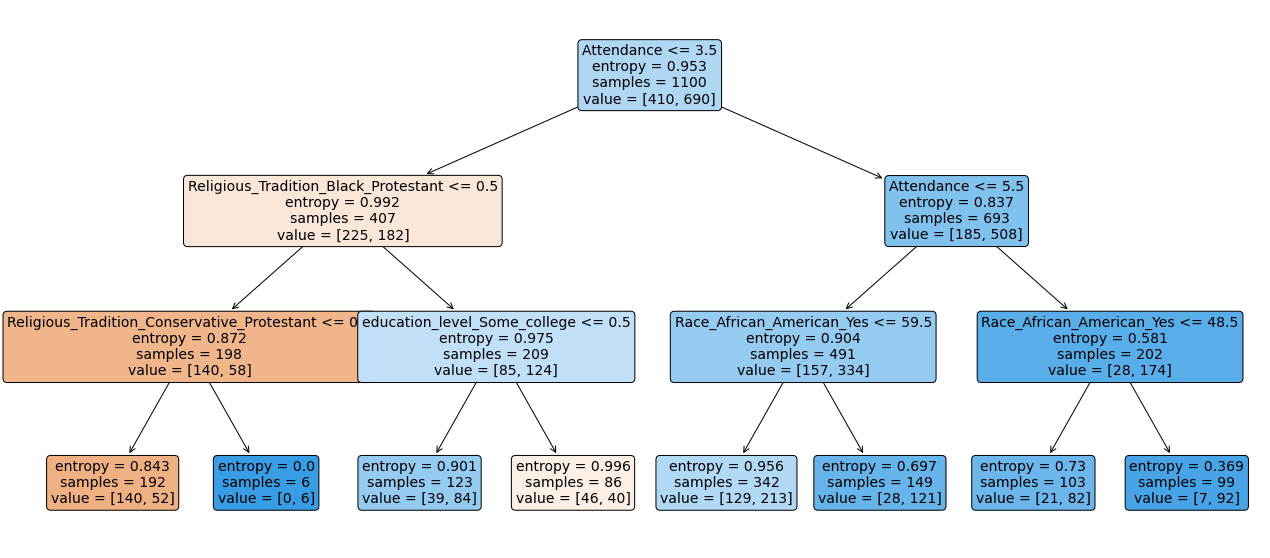

In [38]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[0]] #Ban_SemiAuto_Guns_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)


plt.figure(figsize=(22, 10))
_ = tree.plot_tree(clf, 
                feature_names=religion_survey_catmodel2.columns[:-1],
                filled=True, rounded=True, fontsize=14)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.56448
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.18508
Feature: 14, Score: 0.07445
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.12723
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.04876


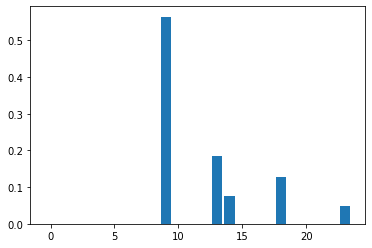

In [39]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

> Ban_High_Capacity_Ammo_Clips_favor

In [61]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[1]] #Ban_High_Capacity_Ammo_Clips_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train,y_train)
print(clf.best_estimator_)
print(clf.best_params_)


DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}


>Ban_High_Capacity_Ammo_Clips_favor tree

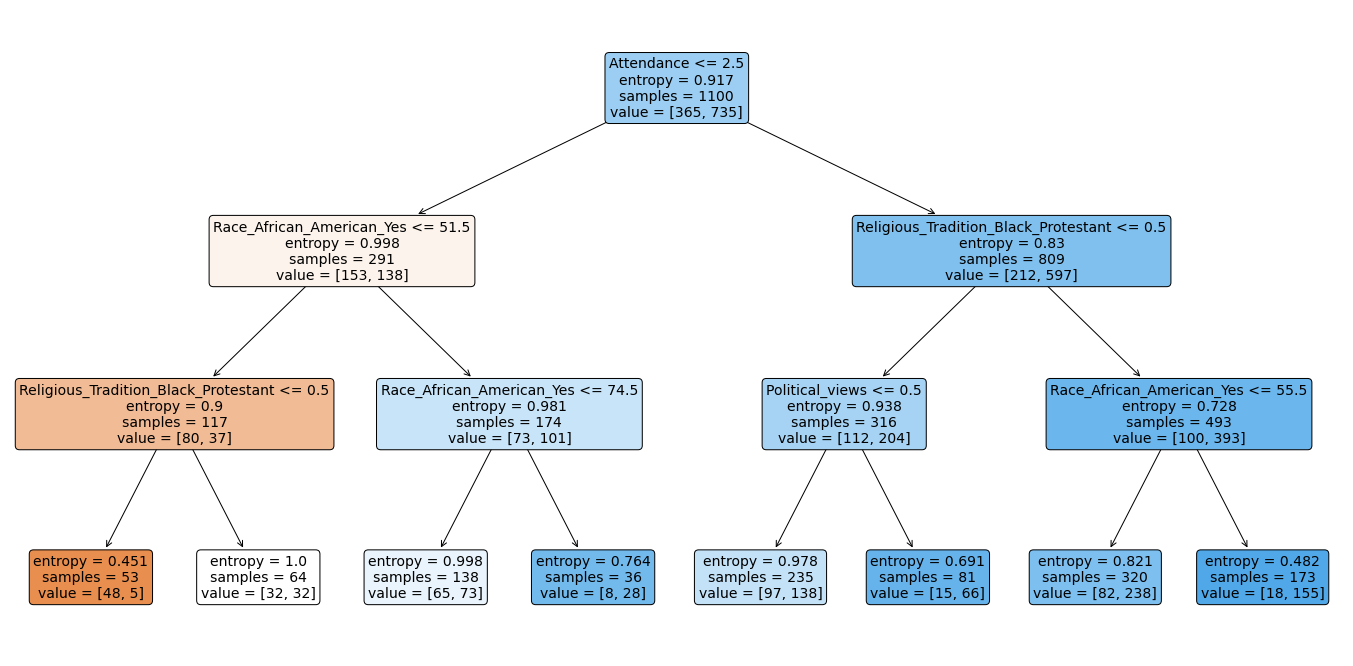

In [62]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[1]] #Ban_High_Capacity_Ammo_Clips_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

plt.figure(figsize=(24, 12))
_ = tree.plot_tree(clf, 
                   feature_names=religion_survey_catmodel2.columns[:-1],
                   filled=True, rounded=True, fontsize=14)

Feature: 0, Score: 0.02524
Feature: 1, Score: 0.04797
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.34936
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.19502
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.06131
Feature: 18, Score: 0.24889
Feature: 19, Score: 0.03236
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.03985
Feature: 23, Score: 0.00000


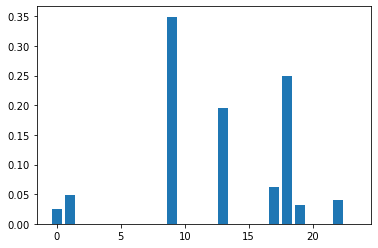

In [42]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

> Ban_Civilian_Handguns_favor

In [43]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[2]] #Ban_Civilian_Handguns_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train,y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=1)
{'max_depth': 1}


> Ban_Civilian_Handguns_favor tree

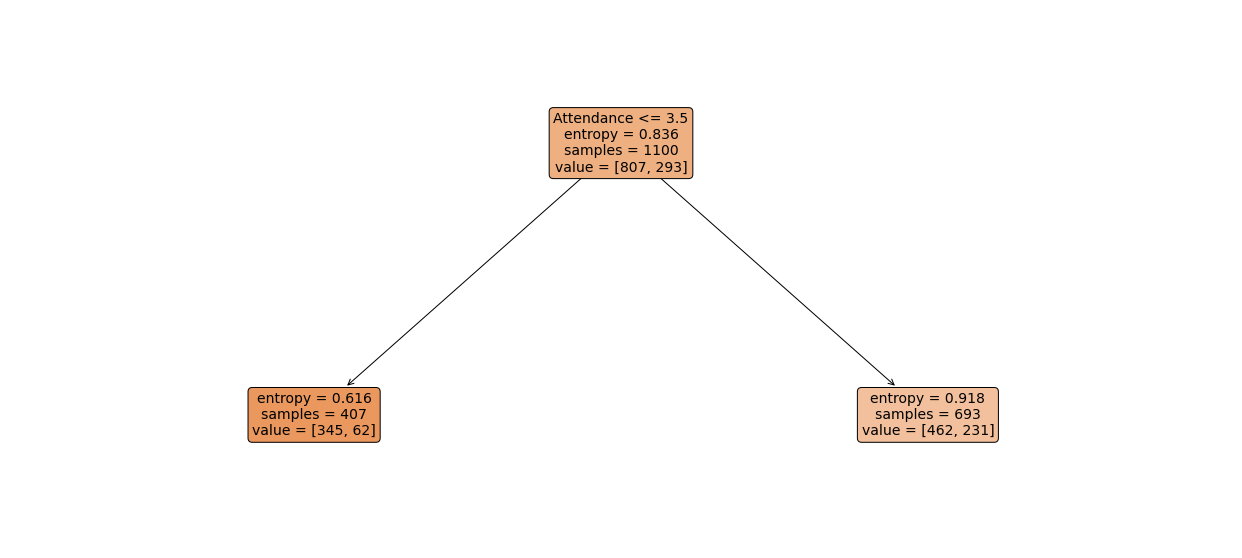

In [44]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[2]] #Ban_Civilian_Handguns_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=1)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

plt.figure(figsize=(22, 10))
_ = tree.plot_tree(clf, 
                   feature_names=religion_survey_catmodel2.columns[:-1],
                   filled=True, rounded=True, fontsize=14)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 1.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


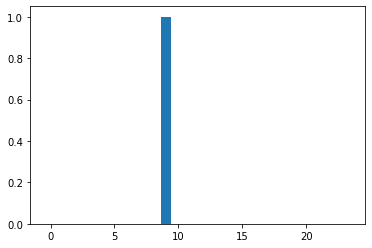

In [45]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

>Support_Concealed_Carry_Laws_favor

In [46]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[3]] #Support_Concealed_Carry_Laws_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)
clf = clf.fit(X_train,y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}


>Support_Concealed_Carry_Laws_favor

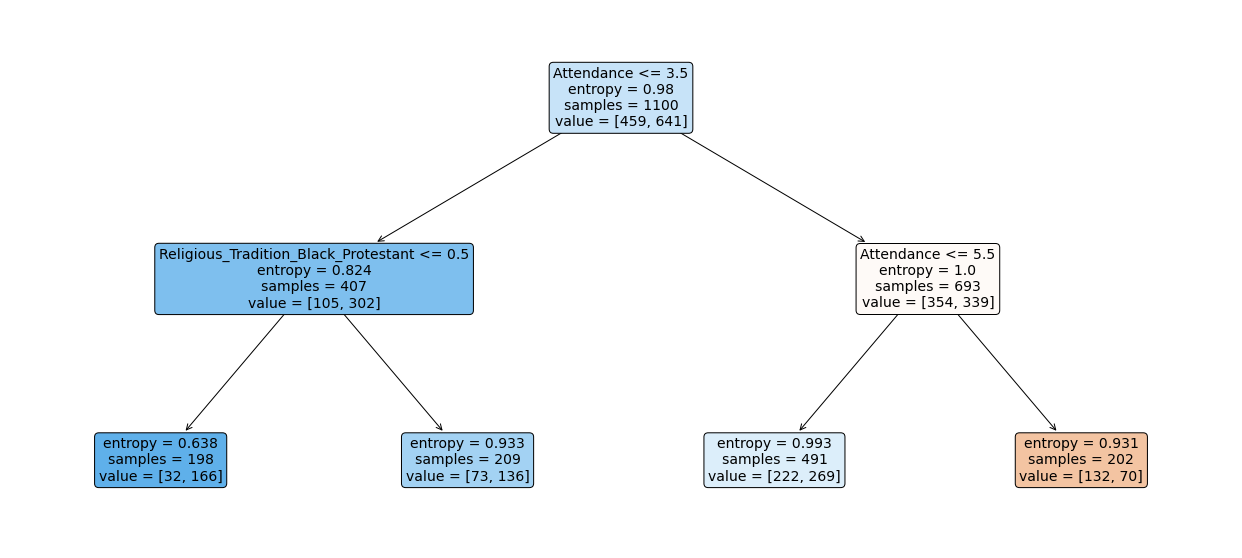

In [47]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[3]] #Ban_SemiAuto_Guns_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)


plt.figure(figsize=(22, 10))
_ = tree.plot_tree(clf, 
                   feature_names=religion_survey_catmodel2.columns[:-1],
                   filled=True, rounded=True, fontsize=14)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.82950
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.17050
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


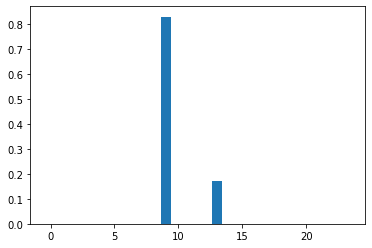

In [48]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

>MoreSecurity_Schools_favor

In [49]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[4]] #MoreSecurity_Schools_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)
clf = clf.fit(X_train,y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}


>MoreSecurity_Schools_favor tree

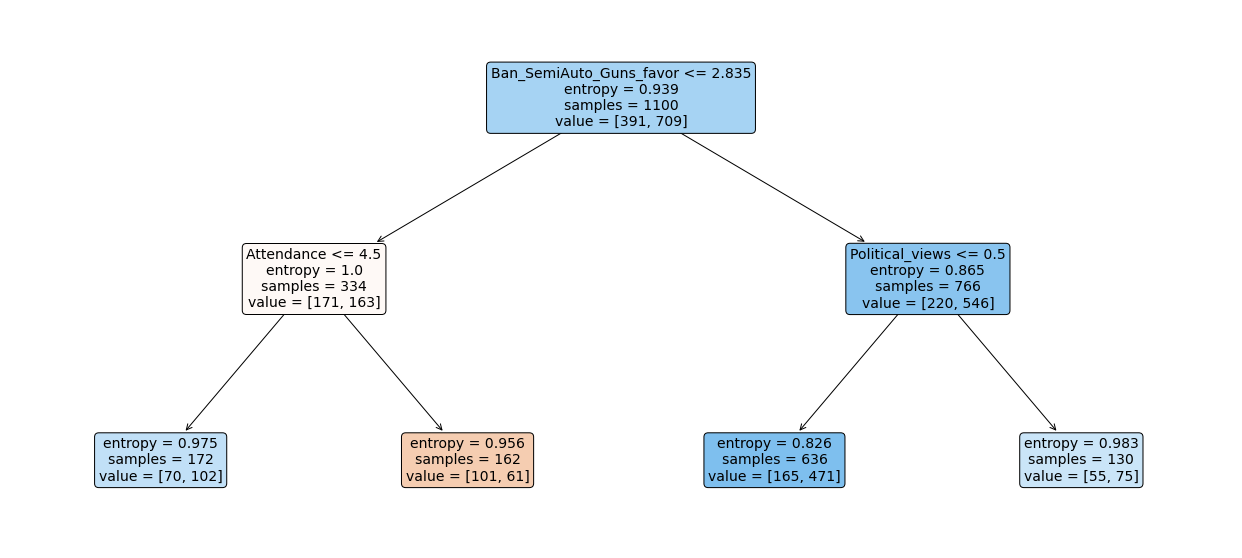

In [50]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[4]] #MoreSecurity_Schools_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

plt.figure(figsize=(22, 10))
_ = tree.plot_tree(clf, 
                   feature_names=religion_survey_catmodel2.columns[:-1],
                   filled=True, rounded=True, fontsize=14)

Feature: 0, Score: 0.63299
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.19892
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.16810
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


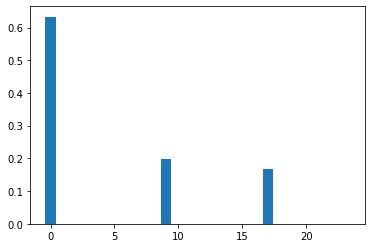

In [51]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

>Teachers_having_Guns_favor

In [52]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[5]] #Teachers_having_Guns_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)
clf = clf.fit(X_train,y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}


>Teachers_having_Guns_favor tree

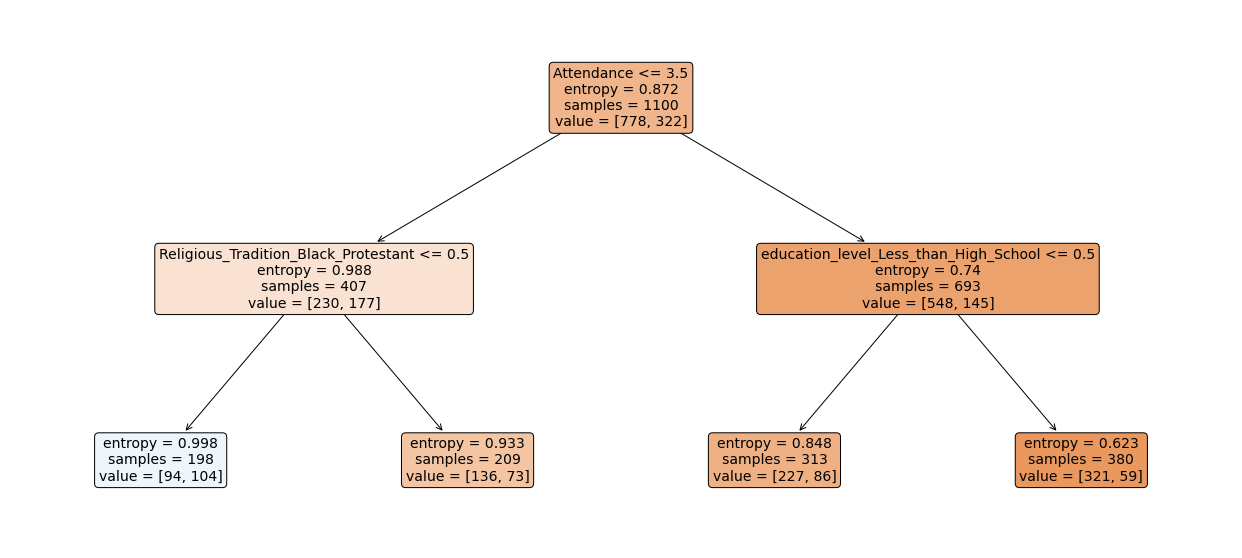

In [53]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[5]] #Teachers_having_Guns_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

plt.figure(figsize=(22, 10))
_ = tree.plot_tree(clf, 
                   feature_names=religion_survey_catmodel2.columns[:-1],
                   filled=True, rounded=True, fontsize=14)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.69102
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.14387
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.16511
Feature: 23, Score: 0.00000


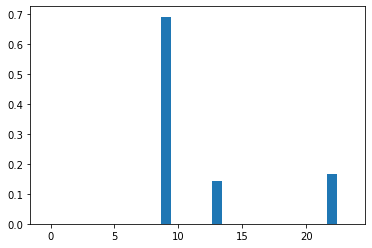

In [54]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

>GunSafety_Programs_favor

In [55]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[6]] #GunSafety_Programs_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)
clf = clf.fit(X_train,y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=1)
{'max_depth': 1}


>GunSafety_Programs_favor tree

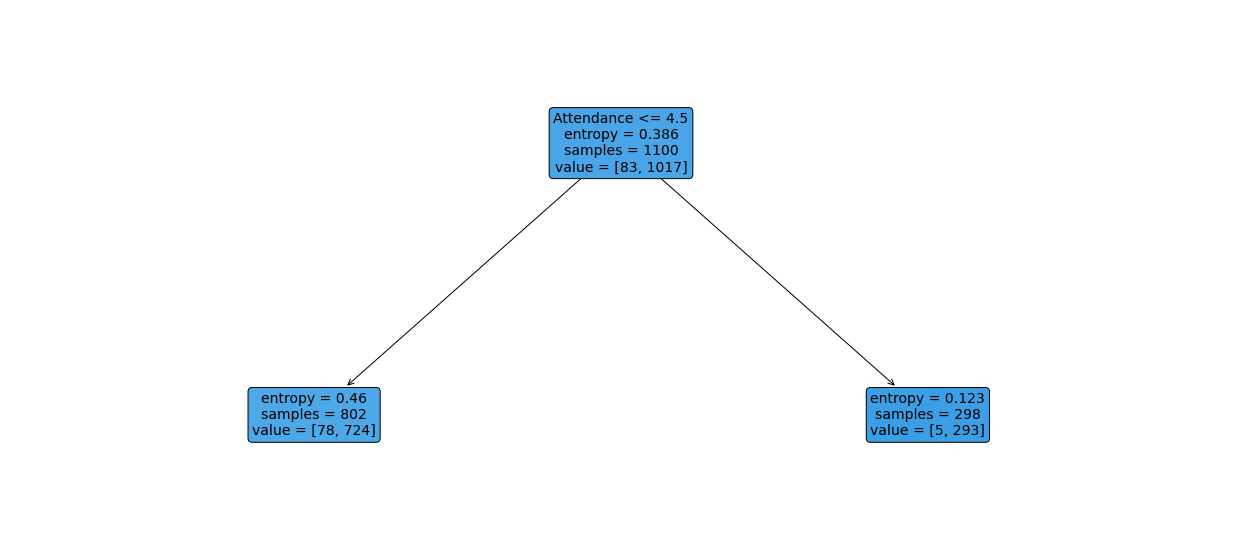

In [56]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[6]] #GunSafety_Programs_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=1)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

plt.figure(figsize=(22, 10))
_ = tree.plot_tree(clf, 
                   feature_names=religion_survey_catmodel2.columns[:-1],
                   filled=True, rounded=True, fontsize=14)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 1.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


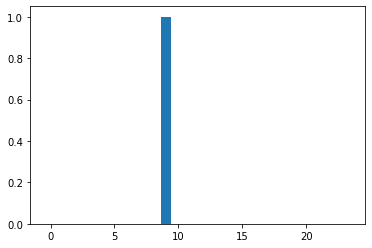

In [57]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

>Mental_Health_Screening_favor

In [58]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[7]] #Mental_Health_Screening_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)
clf = clf.fit(X_train,y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=1)
{'max_depth': 1}


>Mental_Health_Screening_favor tree

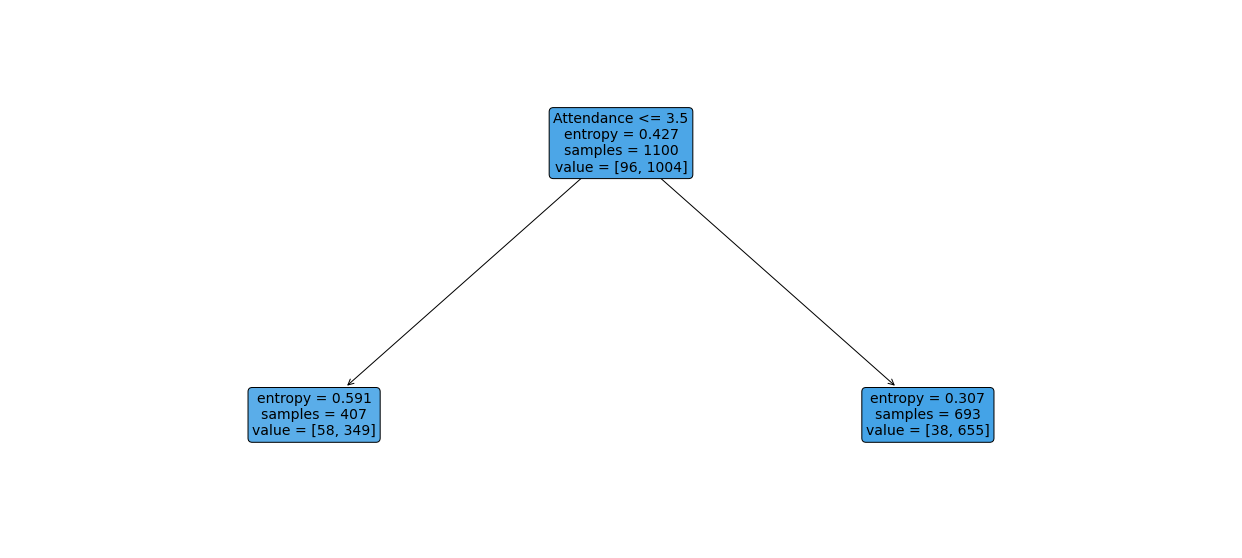

In [59]:
X = religion_survey_catmodel2.loc[:, 'belief_in_evil':'Region_South']# Features
y = religion_survey_catmodel2.iloc[:,[7]] #Mental_Health_Screening_favor # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=1)
clf = clf.fit(X_train,y_train)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

plt.figure(figsize=(22, 10))
_ = tree.plot_tree(clf, 
                   feature_names=religion_survey_catmodel2.columns[:-1],
                   filled=True, rounded=True, fontsize=14)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 1.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


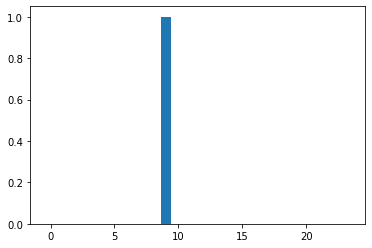

In [60]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Conclusions - Q5

From the above we understand that the focal variable plays the key part in every decision tree we created. That is visualised through the features graphs. 
<br> Belief in supernatural evil, make a strong showing in all models and it is sensible.
<br> We also can see that for each variable we have a different max depth for the decision tree.
<br> Also the simple decision tree seems to be a good solution for 
<br>
<br>In general we can conclude that, Belief in supernatural evil is a robust predictor of support for policies that expand gun rights. In other words, people who believe in overly religious concepts of 
<br> supernatural evil (Satan, hell, and demons) are also more likely to support fewer restrictions on gun policies. 